In [200]:
import pandas as pd
import seaborn as sns
import matplotlib 
from matplotlib import pyplot as plt
import numpy as np 
from scipy import stats 
import pingouin as pg
from scipy.stats import ttest_ind


In [201]:
ac_myocard_infarct = pd.read_excel('Heart data\Acute myocardial infarct.xlsx')

In [202]:
ac_myocard_infarct.isnull().sum()

year                0
country             0
Total               3
males               3
females             3
total_under_65      3
males_under_65      3
females_under_65    3
total_over_65       3
males_over_65       3
females_over_65     3
dtype: int64

In [203]:
no_country = ac_myocard_infarct.pop('country')

In [204]:
no_country.head()

0    European Union
1           Belgium
2          Bulgaria
3           Czechia
4           Denmark
Name: country, dtype: object

In [205]:
ac_myocard_infarct_full = ac_myocard_infarct.apply(lambda x: x.fillna(x.mean()), axis=0)

In [206]:
ac_myocard_infarct_full.insert( 1, 'country', no_country)

In [207]:
ac_myocard_infarct_full.head()

,year,country,Total,males,females,total_under_65,males_under_65,females_under_65,total_over_65,males_over_65,females_over_65
0,2018,European Union,39.55,56.38,26.39,9.51,15.75,3.51,163.57,224.12,120.88
1,2018,Belgium,34.11,47.55,23.56,7.25,11.10,3.43,144.95,198.02,106.65
2,2018,Bulgaria,64.99,92.95,42.44,23.74,39.38,8.67,235.27,314.11,181.83
3,2018,Czechia,42.34,58.61,29.34,8.79,14.91,2.77,180.85,239.01,139.02
4,2018,Denmark,24.85,36.33,15.76,5.32,8.52,2.13,105.47,151.15,72.03


In [208]:
all_death_workforce = pd.read_excel('Heart data\All deaths at working age.xlsx')

In [209]:
#all_death_workforce = all_death_workforce[all_death_workforce]

In [210]:
a_d_wf_no_country = all_death_workforce.pop('country')

In [211]:
all_death_workforce_full = all_death_workforce.apply(lambda x: x.fillna(x.mean()), axis=0)

In [212]:
all_death_workforce_full.head()

,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,11135.0,10346.0,10231.0,9575.0,9405.0,9207.000000,8981.000000,8877.000000,9272.000000,277.5
1,12513.0,11807.0,11742.0,11034.0,10822.0,694.305556,667.088235,665.294118,699.264706,277.5
2,312.0,295.0,299.0,266.0,251.0,246.000000,231.000000,225.000000,231.000000,277.5
3,282.0,244.0,234.0,209.0,183.0,168.000000,174.000000,180.000000,226.000000,277.5
4,345.0,289.0,303.0,276.0,268.0,273.000000,260.000000,205.000000,215.000000,263.0


In [213]:
all_death_workforce_full.insert(0, 'country', a_d_wf_no_country)

In [214]:
all_death_workforce_full.head() #total number of death for people under 65 years old

,country,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,European Union - 27 countries (from 2020),11135.0,10346.0,10231.0,9575.0,9405.0,9207.000000,8981.000000,8877.000000,9272.000000,277.5
1,European Union - 28 countries (2013-2020),12513.0,11807.0,11742.0,11034.0,10822.0,694.305556,667.088235,665.294118,699.264706,277.5
2,Belgium,312.0,295.0,299.0,266.0,251.0,246.000000,231.000000,225.000000,231.000000,277.5
3,Bulgaria,282.0,244.0,234.0,209.0,183.0,168.000000,174.000000,180.000000,226.000000,277.5
4,Czechia,345.0,289.0,303.0,276.0,268.0,273.000000,260.000000,205.000000,215.000000,263.0


In [215]:
all_death_workforce_full.rename(columns={'2013': 'death_work_13', '2014': 'death_work_14','2015': 'death_work_15', 
                                      '2016':'death_work_16', '2017': 'death_work_17', '2018': 'death_work_18','2019': 'death_work_19', 
                                      '2020': 'death_work_20', '2021': 'death_work_21', '2022': 'death_work_22'}, inplace=True)

In [216]:
all_death_workforce_full.head()

,country,death_work_13,death_work_14,death_work_15,death_work_16,death_work_17,death_work_18,death_work_19,death_work_20,death_work_21,death_work_22
0,European Union - 27 countries (from 2020),11135.0,10346.0,10231.0,9575.0,9405.0,9207.000000,8981.000000,8877.000000,9272.000000,277.5
1,European Union - 28 countries (2013-2020),12513.0,11807.0,11742.0,11034.0,10822.0,694.305556,667.088235,665.294118,699.264706,277.5
2,Belgium,312.0,295.0,299.0,266.0,251.0,246.000000,231.000000,225.000000,231.000000,277.5
3,Bulgaria,282.0,244.0,234.0,209.0,183.0,168.000000,174.000000,180.000000,226.000000,277.5
4,Czechia,345.0,289.0,303.0,276.0,268.0,273.000000,260.000000,205.000000,215.000000,263.0


<function matplotlib.pyplot.show(close=None, block=None)>

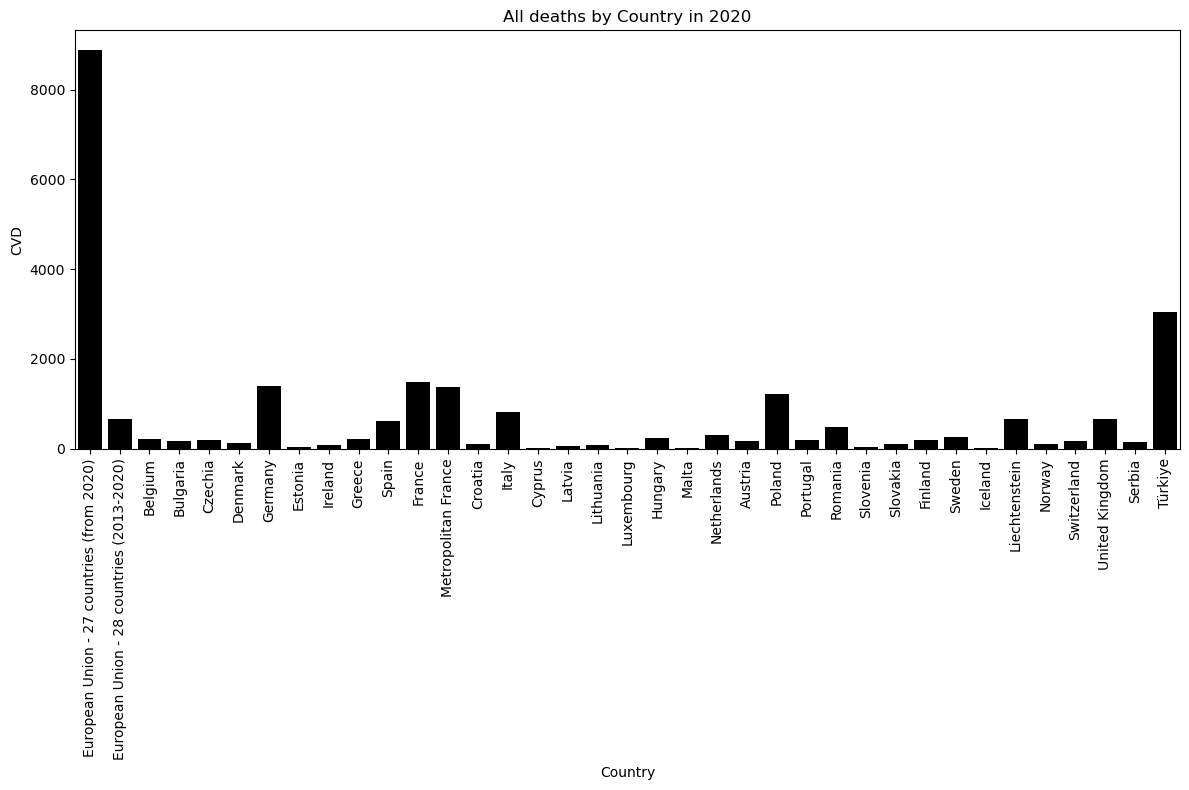

In [217]:
plt.figure(figsize=(12,8))

death_countries = sns.barplot(data= all_death_workforce_full, x= 'country', y= 'death_work_20', color= 'black')

#mean_death = all_death_workforce_full().mean

#death_countries.axhline(mean_death, color='black', linestyle='--', label=f'Mean:{mean_cvd:.2f}')

death_countries.set_title('All deaths by Country in 2020', fontsize=12)
death_countries.set_xlabel('Country', fontsize= 10)
death_countries.set_ylabel( 'CVD', fontsize=10)

plt.xticks(rotation= 90)

plt.tight_layout()
plt.show

In [218]:
cvd_work = pd.read_excel('Heart data\CVD due to work.xlsx')

In [219]:
cvd_work.rename(columns={'TIME': 'country', '2020':'cvd_20'}, inplace=True)

In [220]:
cvd_work.isnull().sum()

country    0
cvd_20     7
dtype: int64

In [221]:
cvd_work

cvd_work_no_country = cvd_work.pop('country')
cvd_work_full = cvd_work.apply(lambda x: x.fillna(x.mean()), axis=0)
cvd_work_full.insert(0, 'country', cvd_work_no_country)

In [222]:
cvd_work_full.isnull().sum()

country    0
cvd_20     0
dtype: int64

In [223]:
cvd_work_full.head()

,country,cvd_20
0,European Union - 27 countries (from 2020),0.500
1,European Union - 28 countries (2013-2020),0.425
2,Euro area - 19 countries (2015-2022),0.200
3,Belgium,0.300
4,Bulgaria,1.400


In [224]:
cvd_work_sorted = cvd_work_full.sort_values(by='cvd_20')

<function matplotlib.pyplot.show(close=None, block=None)>

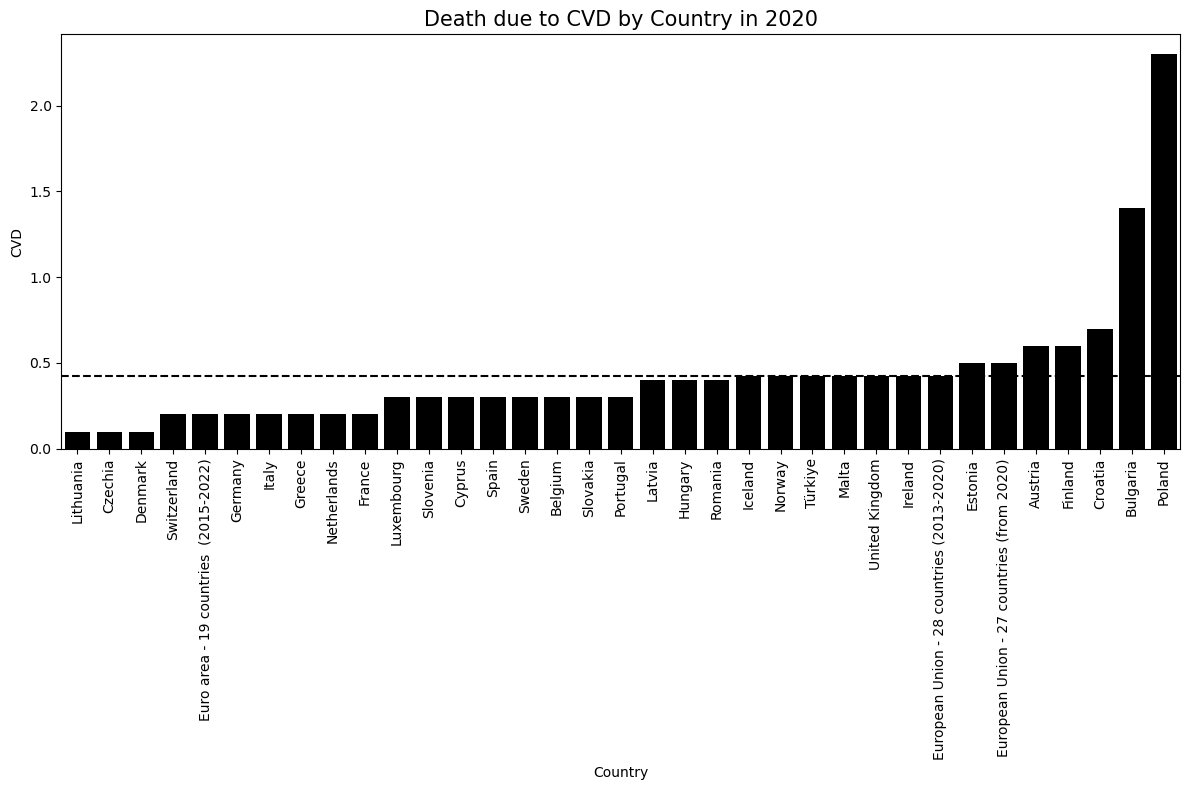

In [225]:
plt.figure(figsize=(12,8))

cvd_countries = sns.barplot(data= cvd_work_sorted, x= 'country', y= 'cvd_20', color= 'black')

mean_cvd = cvd_work['cvd_20'].mean() 

cvd_countries.axhline(mean_cvd, color='black', linestyle='--', label=f'Mean:{mean_cvd:.2f}')

cvd_countries.set_title('Death due to CVD by Country in 2020', fontsize=15)
cvd_countries.set_xlabel('Country', fontsize= 10)
cvd_countries.set_ylabel( 'CVD', fontsize=10)

plt.xticks(rotation= 90)

plt.tight_layout()
plt.show

In [226]:
cvd_work.dropna(inplace=True)

In [227]:
death_other_heart_diseases = pd.read_excel('Heart data\Death by other heart diseases.xlsx')

In [228]:
death_other_heart_diseases.rename(columns={'2012': 'other_12', '2013': 'other_13', '2014': 'other_14','2015': 'other_15', 
                                      '2016':'other_16', '2017': 'other_17', '2018': 'other_18','2019': 'other_19', 
                                      '2020': 'other_20', '2021': 'other_21'}, inplace=True)


In [229]:
death_other_heart_diseases.head()

,country,other_12,other_13,other_14,other_15,other_16,other_17,other_18,other_19,other_20,other_21
0,Belgium,18.64,18.46,16.66,16.07,16.88,17.33,11.33,11.45,11.38,11.87
1,Bulgaria,107.74,116.91,127.89,115.11,135.01,133.17,135.75,124.77,124.88,132.79
2,Czechia,25.86,21.04,21.70,23.47,25.71,27.75,26.48,25.67,25.55,27.93
3,Denmark,12.37,12.14,13.83,12.18,13.22,14.58,13.78,11.05,9.42,10.10
4,Germany,18.03,17.76,17.65,19.09,16.88,15.29,15.21,12.98,12.39,13.05


In [230]:
death_other_heart_diseases.isnull().sum()

country     0
other_12    0
other_13    0
other_14    0
other_15    0
other_16    0
other_17    0
other_18    0
other_19    0
other_20    0
other_21    0
dtype: int64

In [231]:
expenses_healthcare = pd.read_excel('Heart data\Expenditure in healthcare.xlsx') 

In [232]:
expenses_healthcare.rename(columns={'TIME': 'country', '2012': 'exp_12', '2013': 'exp_13', '2014': 'exp_14','2015': 'exp_15', 
                                      '2016':'exp_16', '2017': 'exp_17', '2018': 'exp_18','2019': 'exp_19', 
                                      '2020': 'exp_20', '2021': 'exp_21', '2022': 'exp_22', '2023':'exp_23'}, inplace=True)

In [233]:
expenses_healthcare.head()

,country,exp_12,exp_13,exp_14,exp_15,exp_16,exp_17,exp_18,exp_19,exp_20,exp_21,exp_22,exp_23
0,European Union - 27 countries (from 2020),NaN,NaN,180885.50,186125.51,193175.30,208001.81,217206.33,227159.57,243002.47,255332.48,NaN,NaN
1,Euro area – 20 countries (from 2023),NaN,NaN,158678.69,163200.99,169471.14,183186.60,191992.27,201151.96,215198.64,225637.74,NaN,NaN
2,Euro area - 19 countries (2015-2022),NaN,NaN,158589.44,163103.02,169372.15,183084.66,191882.62,201033.40,215082.57,225512.79,NaN,NaN
3,Belgium,8460.02,8852.82,9338.09,10334.36,11289.13,11831.11,12477.06,11964.11,11244.63,11897.60,NaN,NaN
4,Bulgaria,2.75,3.32,3.58,4.39,3.34,3.59,4.26,5.32,110.15,196.77,283.48,NaN


In [234]:
expenses_healthcare.isnull().sum()

country     0
exp_12     16
exp_13     10
exp_14      5
exp_15      5
exp_16      5
exp_17      5
exp_18      5
exp_19      5
exp_20      6
exp_21      5
exp_22     31
exp_23     40
dtype: int64

In [235]:
exp_no_country = expenses_healthcare.pop('country')
exp_health_full = expenses_healthcare.apply(lambda x: x.fillna(x.mean()), axis=0)
exp_health_full.insert(0, 'country', exp_no_country)

In [236]:
exp_health_full.isnull().sum()

country    0
exp_12     0
exp_13     0
exp_14     0
exp_15     0
exp_16     0
exp_17     0
exp_18     0
exp_19     0
exp_20     0
exp_21     0
exp_22     0
exp_23     0
dtype: int64

In [237]:
exp_health_full.head()

,country,exp_12,exp_13,exp_14,exp_15,exp_16,exp_17,exp_18,exp_19,exp_20,exp_21,exp_22,exp_23
0,European Union - 27 countries (from 2020),7608.8516,7564.522581,180885.50,186125.51,193175.30,208001.81,217206.33,227159.57,243002.47,255332.48,5532.163,17684.0
1,Euro area – 20 countries (from 2023),7608.8516,7564.522581,158678.69,163200.99,169471.14,183186.60,191992.27,201151.96,215198.64,225637.74,5532.163,17684.0
2,Euro area - 19 countries (2015-2022),7608.8516,7564.522581,158589.44,163103.02,169372.15,183084.66,191882.62,201033.40,215082.57,225512.79,5532.163,17684.0
3,Belgium,8460.0200,8852.820000,9338.09,10334.36,11289.13,11831.11,12477.06,11964.11,11244.63,11897.60,5532.163,17684.0
4,Bulgaria,2.7500,3.320000,3.58,4.39,3.34,3.59,4.26,5.32,110.15,196.77,283.480,17684.0


In [238]:
death_ischaemic = pd.read_excel('Heart data\Death by ischaemic heart.xlsx')

In [239]:
death_ischaemic.rename(columns={'2012': 'isch_12', '2013': 'isch_13', '2014': 'isch_14','2015': 'isch_15', 
                                      '2016':'isch_16', '2017': 'isch_17', '2018': 'isch_18','2019': 'isch_19', 
                                      '2020': 'isch_20', '2021': 'isch_21'}, inplace=True)


In [240]:
death_ischaemic.head()

,country,isch_12,isch_13,isch_14,isch_15,isch_16,isch_17,isch_18,isch_19,isch_20,isch_21
0,Belgium,25.91,25.33,23.62,23.67,21.34,20.91,20.68,19.02,17.74,17.94
1,Bulgaria,82.84,76.19,79.70,77.36,76.47,78.32,77.16,76.88,90.63,95.52
2,Czechia,69.01,70.49,62.98,60.09,53.99,53.84,53.67,50.34,49.64,49.65
3,Denmark,23.70,22.11,21.45,20.68,20.51,19.22,18.47,18.84,18.28,17.79
4,Germany,37.94,36.78,34.62,35.42,33.65,32.54,32.06,30.24,30.88,30.71


In [241]:
death_ischaemic.isnull().sum()

country    0
isch_12    0
isch_13    0
isch_14    0
isch_15    0
isch_16    0
isch_17    0
isch_18    0
isch_19    0
isch_20    0
isch_21    0
dtype: int64

In [242]:
death_other_ischaemic = pd.read_excel('Heart data\Death by other ischaemic diseases.xlsx')

In [243]:
death_other_ischaemic.rename(columns={'2012': 'other_isch_12', '2013': 'other_isch_13', '2014': 'other_isch_14','2015': 'other_isch_15', 
                                      '2016':'other_isch_16', '2017': 'other_isch_17', '2018': 'other_isch_18','2019': 'other_isch_19', 
                                      '2020': 'other_isch_20', '2021': 'other_isch_21'}, inplace=True)


In [244]:
death_other_ischaemic.isnull().sum()

country          0
other_isch_12    0
other_isch_13    0
other_isch_14    0
other_isch_15    0
other_isch_16    0
other_isch_17    0
other_isch_18    0
other_isch_19    0
other_isch_20    0
other_isch_21    0
dtype: int64

In [245]:
death_other_ischaemic.head()

,country,other_isch_12,other_isch_13,other_isch_14,other_isch_15,other_isch_16,other_isch_17,other_isch_18,other_isch_19,other_isch_20,other_isch_21
0,Belgium,6.32,6.38,6.15,6.75,5.64,5.55,6.16,5.83,5.33,5.60
1,Bulgaria,30.91,29.35,28.15,29.10,27.88,32.90,29.11,30.01,36.25,37.56
2,Czechia,37.85,42.16,39.32,38.37,34.01,34.10,35.99,33.38,32.71,32.68
3,Denmark,9.64,10.45,10.78,9.79,9.75,9.45,7.83,8.96,9.35,9.23
4,Germany,12.22,11.85,11.60,12.45,11.61,11.65,11.53,11.26,11.09,10.97


In [278]:
all_heart = cvd_work_full.merge(ac_myocard_infarct_full, on= 'country', how= 'inner').merge(all_death_workforce_full, on='country', how='inner').merge(death_other_heart_diseases, on='country', how='inner').merge(exp_health_full, on='country', how='inner').merge(death_ischaemic, on='country', how='inner').merge(death_other_ischaemic, on='country', how='inner')

In [247]:
all_heart.isnull().sum()

country          0
cvd_20           0
year             0
Total            0
males            0
                ..
other_isch_17    0
other_isch_18    0
other_isch_19    0
other_isch_20    0
other_isch_21    0
Length: 64, dtype: int64

In [248]:
all_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 64 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   country           128 non-null    object 
 1   cvd_20            128 non-null    float64
 2   year              128 non-null    int64  
 3   Total             128 non-null    float64
 4   males             128 non-null    float64
 5   females           128 non-null    float64
 6   total_under_65    128 non-null    float64
 7   males_under_65    128 non-null    float64
 8   females_under_65  128 non-null    float64
 9   total_over_65     128 non-null    float64
 10  males_over_65     128 non-null    float64
 11  females_over_65   128 non-null    float64
 12  death_work_13     128 non-null    float64
 13  death_work_14     128 non-null    float64
 14  death_work_15     128 non-null    float64
 15  death_work_16     128 non-null    float64
 16  death_work_17     128 non-null    float64
 1

In [279]:
all_heart.dropna(inplace=True)

In [280]:
all_heart.isnull().sum()

country          0
cvd_20           0
year             0
Total            0
males            0
                ..
other_isch_17    0
other_isch_18    0
other_isch_19    0
other_isch_20    0
other_isch_21    0
Length: 64, dtype: int64

In [281]:
wlb = pd.read_csv('Cities with the Best Work-Life Balance 2022.csv', delimiter= ',')

In [282]:
wlb.columns = wlb.columns.str.replace( ' ', '_').str.lower()

remote_job = wlb['remote_jobs']
remote_job = remote_job.str.replace('%', '', regex=False)
remote_job = remote_job.astype('float')
wlb['remote_jobs'] = remote_job

overwork = wlb['overworked_population']
overwork = overwork.str.replace('%', '', regex=False)
overwork = overwork.astype('float')
wlb['overworked_population'] = overwork

multi_jobs = wlb['multiple_jobholders']
multi_jobs = multi_jobs.str.replace('%', '', regex=False)
multi_jobs = multi_jobs.astype('float')
wlb['multiple_jobholders'] = multi_jobs

vacation_taken = wlb['vacations_taken_(days)']
vacation_taken = vacation_taken.replace('-', '0', regex=False)
vacation_taken = vacation_taken.astype('float')
wlb['vacations_taken_(days)'] = vacation_taken

parental_leave = wlb['paid_parental_leave_(days)']
parental_leave = parental_leave.str.replace(',', '.', regex=False)
parental_leave = parental_leave.astype('float')
wlb['paid_parental_leave_(days)'] = parental_leave

inflation_1 = wlb['inflation']
inflation_1 = inflation_1.str.replace('%', '', regex=False)
inflation_1 = inflation_1.astype('float')
wlb['inflation'] = inflation_1

wlb.drop(['2021', '2022'], axis=1, inplace=True)



In [283]:
wlb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   city                              100 non-null    object 
 1   country                           100 non-null    object 
 2   remote_jobs                       100 non-null    float64
 3   overworked_population             100 non-null    float64
 4   minimum_vacations_offered_(days)  100 non-null    int64  
 5   vacations_taken_(days)            100 non-null    float64
 6   unemployment                      100 non-null    float64
 7   multiple_jobholders               100 non-null    float64
 8   inflation                         100 non-null    float64
 9   paid_parental_leave_(days)        100 non-null    float64
 10  covid_impact                      100 non-null    float64
 11  covid_support                     100 non-null    float64
 12  healthcar

In [284]:
wlb_heart_2 = pd.merge(wlb, all_heart, on= 'country', how='inner')

In [255]:
wlb_heart_2['country'].unique()

array(['Norway', 'Switzerland', 'Finland', 'Denmark', 'Germany', 'Sweden',
       'Netherlands', 'France', 'Austria', 'Ireland', 'Belgium', 'Spain',
       'Portugal', 'Hungary', 'Italy'], dtype=object)

In [256]:
wlb_heart_2.shape

(108, 85)

In [257]:
wlb_heart_2.isnull().sum()

city                                0
country                             0
remote_jobs                         0
overworked_population               0
minimum_vacations_offered_(days)    0
                                   ..
other_isch_17                       0
other_isch_18                       0
other_isch_19                       0
other_isch_20                       0
other_isch_21                       0
Length: 85, dtype: int64

In [258]:
wlb_heart_2.shape

(108, 85)

In [259]:
wlb_heart_2['country'].value_counts()

country
Germany        36
Switzerland    12
Austria         8
Spain           8
Norway          4
Finland         4
Denmark         4
Sweden          4
Netherlands     4
France          4
Ireland         4
Belgium         4
Portugal        4
Hungary         4
Italy           4
Name: count, dtype: int64

In [260]:
wlb_heart_corr_1 = wlb_heart_2.drop('country', axis=1)

In [308]:
wlb_heart_2['all_cvd_21'] = cor_wlb_heart['isch_21']+ cor_wlb_heart['other_21']+ cor_wlb_heart['other_isch_21']

In [309]:
wlb_heart_2.columns

Index(['city', 'country', 'remote_jobs', 'overworked_population',
       'minimum_vacations_offered_(days)', 'vacations_taken_(days)',
       'unemployment', 'multiple_jobholders', 'inflation',
       'paid_parental_leave_(days)', 'covid_impact', 'covid_support',
       'healthcare', 'access_to_mental_healthcare', 'inclusivity_&_tolerance',
       'affordability', 'happiness,_culture_&_leisure', 'city_safety',
       'outdoor_spaces', 'air_quality', 'wellness_and_fitness', 'total_score',
       'cvd_20', 'year', 'Total', 'males', 'females', 'total_under_65',
       'males_under_65', 'females_under_65', 'total_over_65', 'males_over_65',
       'females_over_65', 'death_work_13', 'death_work_14', 'death_work_15',
       'death_work_16', 'death_work_17', 'death_work_18', 'death_work_19',
       'death_work_20', 'death_work_21', 'death_work_22', 'other_12',
       'other_13', 'other_14', 'other_15', 'other_16', 'other_17', 'other_18',
       'other_19', 'other_20', 'other_21', 'exp_12', 'e

In [310]:
cor_wlb_heart = wlb_heart_2.drop([ 'country', 'city', 'cvd_20', 'year', 'Total', 'males', 'females', 'total_under_65',
       'males_under_65', 'females_under_65', 'total_over_65', 'males_over_65',
       'females_over_65', 'death_work_13', 'death_work_14', 'death_work_15',
       'death_work_16', 'death_work_17', 'death_work_18', 'death_work_19', 'death_work_20', 'death_work_22', 'other_12',
       'other_13', 'other_14', 'other_15', 'other_16', 'other_17', 'other_18',
       'other_19', 'other_20', 'exp_12', 'exp_13', 'exp_14', 'exp_15', 'exp_16', 'exp_17', 'exp_18', 'exp_19','exp_20', 'exp_22', 'exp_23', 
       'isch_12', 'isch_13',  'isch_14', 'isch_15', 'isch_16', 'isch_17', 'isch_18', 'isch_19','isch_20','other_isch_12', 'other_isch_13', 'other_isch_14',
       'other_isch_15', 'other_isch_16', 'other_isch_17', 'other_isch_18', 'other_isch_19', 'other_isch_20'], axis= 1)

In [311]:
cor_wlb_heart.columns

Index(['remote_jobs', 'overworked_population',
       'minimum_vacations_offered_(days)', 'vacations_taken_(days)',
       'unemployment', 'multiple_jobholders', 'inflation',
       'paid_parental_leave_(days)', 'covid_impact', 'covid_support',
       'healthcare', 'access_to_mental_healthcare', 'inclusivity_&_tolerance',
       'affordability', 'happiness,_culture_&_leisure', 'city_safety',
       'outdoor_spaces', 'air_quality', 'wellness_and_fitness', 'total_score',
       'death_work_21', 'other_21', 'exp_21', 'isch_21', 'other_isch_21',
       'all_cvd_21'],
      dtype='object')

In [312]:
cor_1 = cor_wlb_heart.corr()

In [313]:
cor_1 = cor_1.round(1)

In [266]:
#p_values_corr = pd.DataFrame(index=cor_1.index, columns=cor_1.columns)

In [267]:
#test to proint the p_values
# for col1 in cor_wlb_heart.columns:    
#     for col2 in cor_wlb_heart.columns:
#         if col1 != col2:
#             corr_test = pg.corr(cor_wlb_heart[col1], cor_wlb_heart[col2])
#             p_values_corr.loc[col1,col2] = corr_test['p_value'].values[0]
            
#         else:
#             p_values_corr.loc[col1,col2] = None

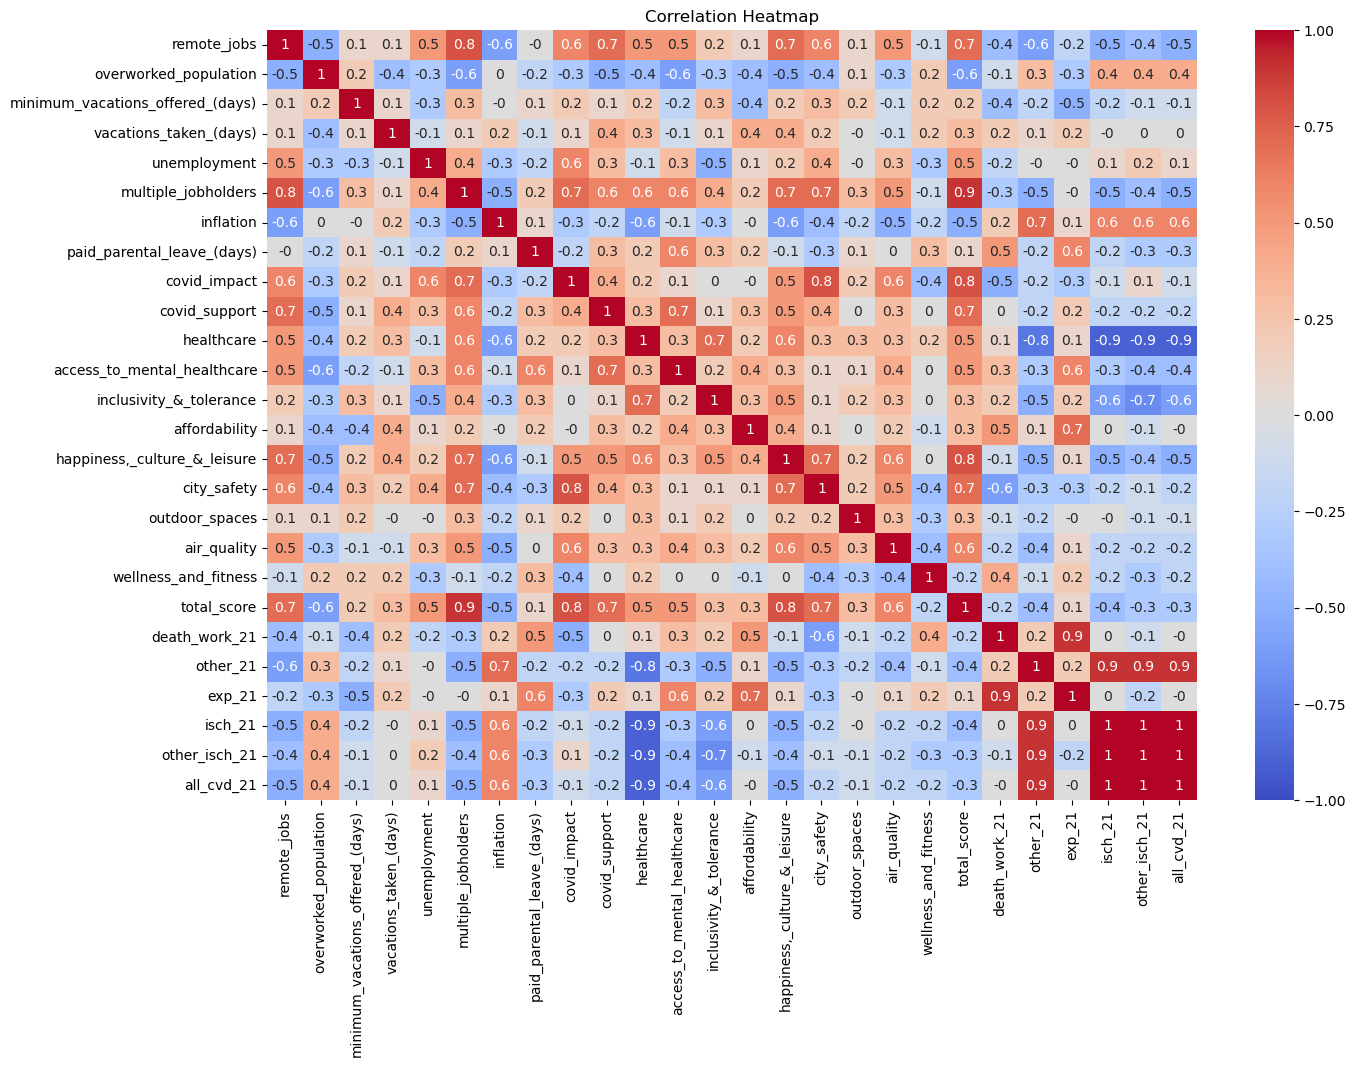

In [315]:
plt.figure(figsize=(15,10))

sns.heatmap(cor_1, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.xticks(rotation = 90)
plt.show()

In [269]:
#Define a threshold to split the groups, for example, median or mean value

threshold = cor_wlb_heart['total_score'].median()

# Split into two groups
max_score = cor_wlb_heart[cor_wlb_heart['total_score'] > threshold]['exp_21']
min_score = cor_wlb_heart[cor_wlb_heart['total_score'] <= threshold]['exp_21']


# Calculate t-statistic and p-value
t_stat, p_value = ttest_ind(max_score, min_score)
print(f'T-test results: t-statistic = {t_stat}, p-value = {p_value}')

T-test results: t-statistic = 1.2610483338471636, p-value = 0.21005986377753025


In [299]:
wlb_heart_2 = pd.merge(wlb, all_heart, on= 'country', how='inner')

In [331]:
wlb_heart_2['all_cvd_21'] = cor_wlb_heart['isch_21']+ cor_wlb_heart['other_21']+ cor_wlb_heart['other_isch_21']

In [338]:
wlb_heart_2.columns

Index(['city', 'country', 'remote_jobs', 'overworked_population',
       'minimum_vacations_offered_(days)', 'vacations_taken_(days)',
       'unemployment', 'multiple_jobholders', 'inflation',
       'paid_parental_leave_(days)', 'covid_impact', 'covid_support',
       'healthcare', 'access_to_mental_healthcare', 'inclusivity_&_tolerance',
       'affordability', 'happiness,_culture_&_leisure', 'city_safety',
       'outdoor_spaces', 'air_quality', 'wellness_and_fitness', 'total_score',
       'cvd_20', 'year', 'Total', 'males', 'females', 'total_under_65',
       'males_under_65', 'females_under_65', 'total_over_65', 'males_over_65',
       'females_over_65', 'death_work_13', 'death_work_14', 'death_work_15',
       'death_work_16', 'death_work_17', 'death_work_18', 'death_work_19',
       'death_work_20', 'death_work_21', 'death_work_22', 'other_12',
       'other_13', 'other_14', 'other_15', 'other_16', 'other_17', 'other_18',
       'other_19', 'other_20', 'other_21', 'exp_12', 'e

In [344]:
clean_cor = wlb_heart_2.drop(columns=['city', 'country',
       'minimum_vacations_offered_(days)', 'vacations_taken_(days)',
       'unemployment', 'inflation', 'healthcare',
       'paid_parental_leave_(days)', 'covid_impact', 'covid_support', 'access_to_mental_healthcare', 'inclusivity_&_tolerance',
       'affordability', 'happiness,_culture_&_leisure',
       'outdoor_spaces', 'air_quality', 'wellness_and_fitness',
       'cvd_20', 'year', 'Total', 'males', 'females', 'total_under_65',
       'males_under_65', 'females_under_65', 'total_over_65', 'males_over_65',
       'females_over_65', 'death_work_13', 'death_work_14', 'death_work_15',
       'death_work_16', 'death_work_17', 'death_work_18', 'death_work_19',
       'death_work_20', 'death_work_21', 'death_work_22', 'other_12',
       'other_13', 'other_14', 'other_15', 'other_16', 'other_17', 'other_18',
       'other_19', 'other_20', 'other_21', 'exp_12', 'exp_13', 'exp_14',
       'exp_15', 'exp_16', 'exp_17', 'exp_18', 'exp_19', 'exp_20', 'exp_21',
       'exp_22', 'exp_23', 'isch_12', 'isch_13', 'isch_14', 'isch_15',
       'isch_16', 'isch_17', 'isch_18', 'isch_19', 'isch_20', 'isch_21',
       'other_isch_12', 'other_isch_13', 'other_isch_14', 'other_isch_15',
       'other_isch_16', 'other_isch_17', 'other_isch_18', 'other_isch_19',
       'other_isch_20', 'other_isch_21', 'city_safety', 'total_score'])

In [351]:
clean_cor_life = wlb_heart_2.drop(columns=['city', 'country', 'remote_jobs', 'overworked_population',
       'minimum_vacations_offered_(days)', 'vacations_taken_(days)',
       'unemployment', 'multiple_jobholders',
       'paid_parental_leave_(days)', 'covid_impact', 'covid_support', 'access_to_mental_healthcare',
       'affordability', 'city_safety',
       'outdoor_spaces', 'air_quality', 'wellness_and_fitness', 'total_score',
       'cvd_20', 'year', 'Total', 'males', 'females', 'total_under_65',
       'males_under_65', 'females_under_65', 'total_over_65', 'males_over_65',
       'females_over_65', 'death_work_13', 'death_work_14', 'death_work_15',
       'death_work_16', 'death_work_17', 'death_work_18', 'death_work_19',
       'death_work_20', 'death_work_21', 'death_work_22', 'other_12',
       'other_13', 'other_14', 'other_15', 'other_16', 'other_17', 'other_18',
       'other_19', 'other_20', 'other_21', 'exp_12', 'exp_13', 'exp_14',
       'exp_15', 'exp_16', 'exp_17', 'exp_18', 'exp_19', 'exp_20', 'exp_21',
       'exp_22', 'exp_23', 'isch_12', 'isch_13', 'isch_14', 'isch_15',
       'isch_16', 'isch_17', 'isch_18', 'isch_19', 'isch_20', 'isch_21',
       'other_isch_12', 'other_isch_13', 'other_isch_14', 'other_isch_15',
       'other_isch_16', 'other_isch_17', 'other_isch_18', 'other_isch_19',
       'other_isch_20', 'other_isch_21'])

In [352]:
clean_cor_life.columns

Index(['inflation', 'healthcare', 'inclusivity_&_tolerance',
       'happiness,_culture_&_leisure', 'all_cvd_21'],
      dtype='object')

In [346]:
clean_matrix_work = clean_cor.corr()

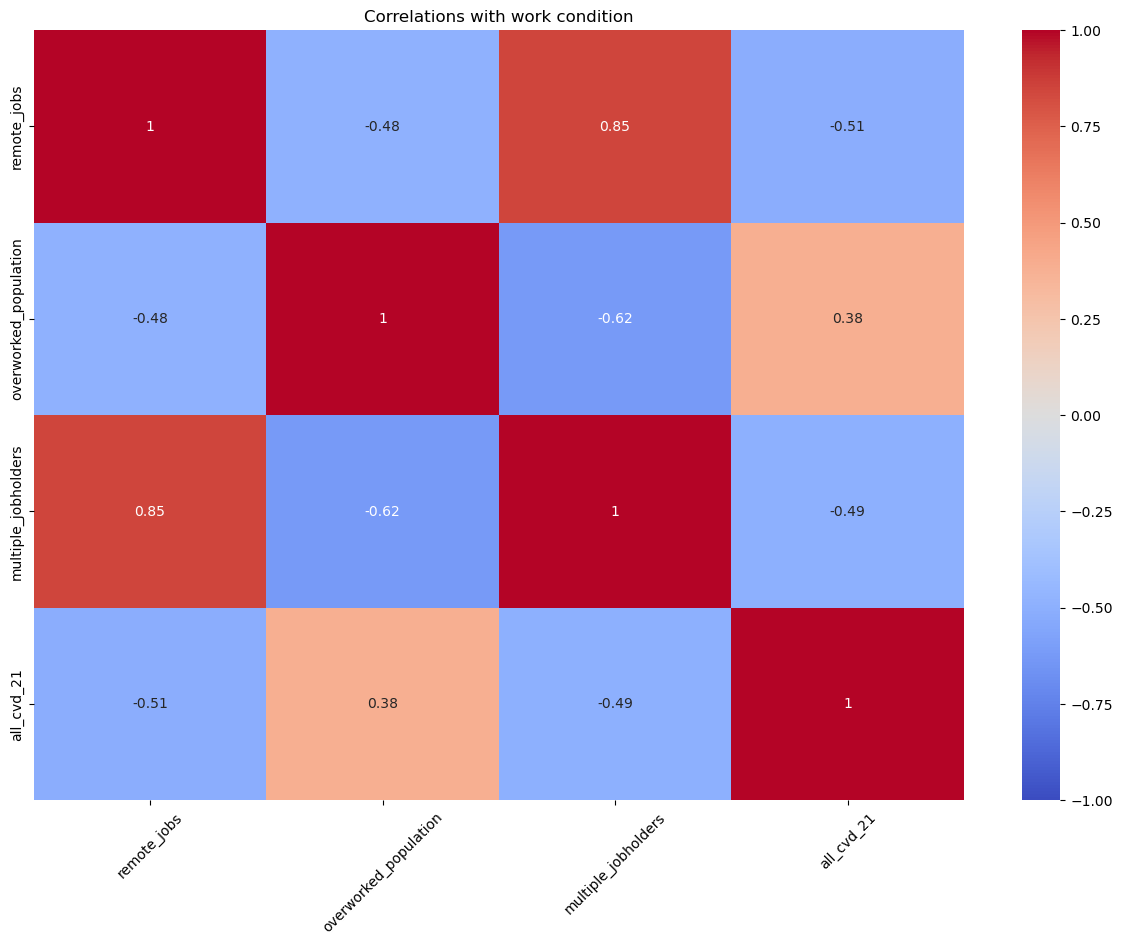

In [350]:
plt.figure(figsize=(15,10))

sns.heatmap(clean_matrix_work, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlations with work condition')
plt.xticks(rotation = 45)
plt.show()

In [353]:
clean_matrix_life = clean_cor_life.corr()

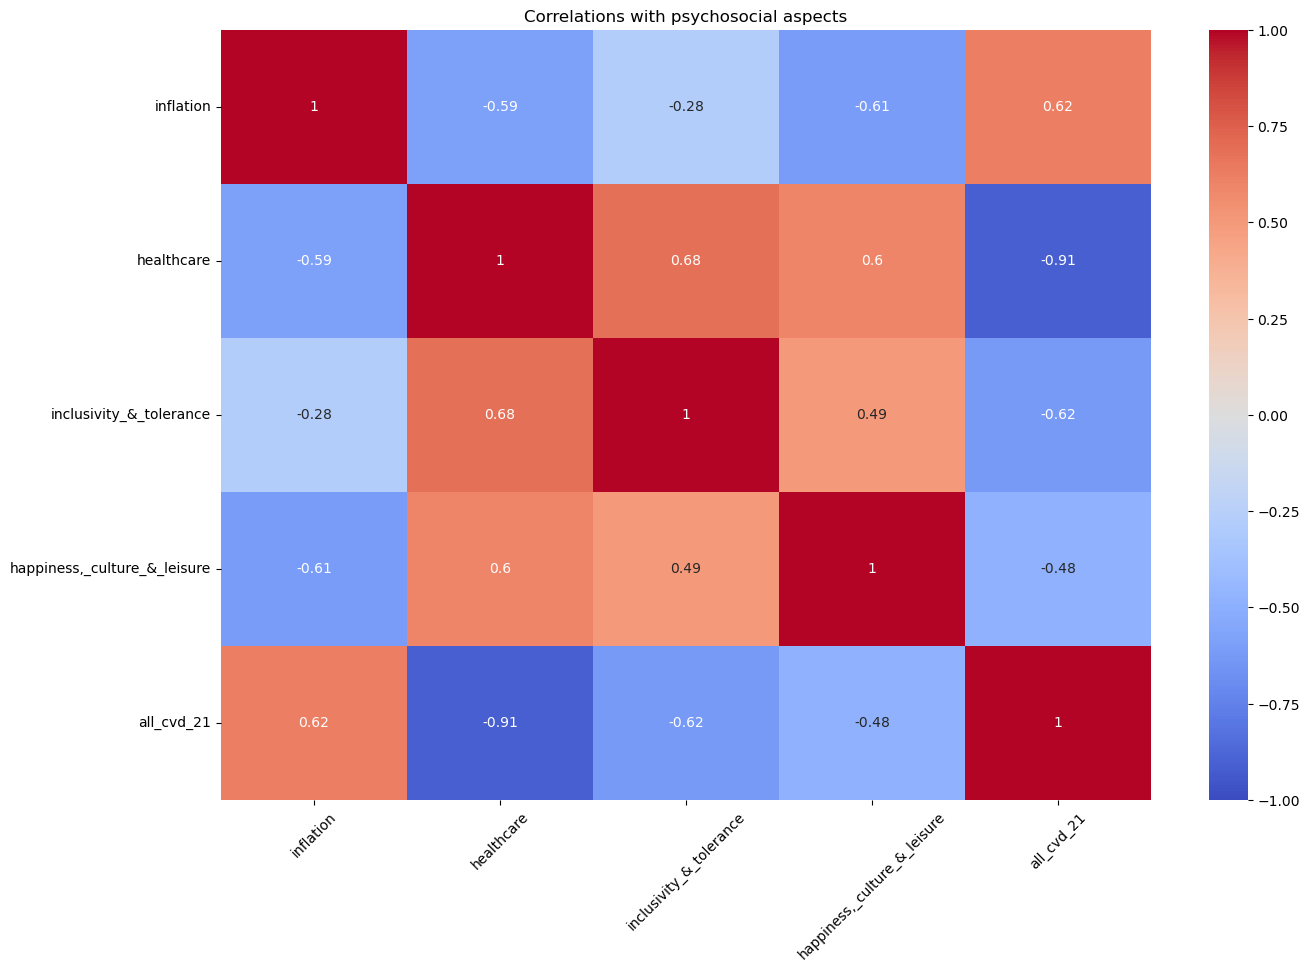

In [356]:
plt.figure(figsize=(15,10))

sns.heatmap(clean_matrix_life, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlations with psychosocial aspects')
plt.xticks(rotation = 45)
plt.show()

In [273]:
# schema = 'cgn_analytics_24_2'
# engine = get_engine()

# table_name = 'wlb_heart_agg'
# if engine!=None:
#     try:
#         wlb_heart_agg.to_sql(name=table_name, # Name of SQL table
#                         con=engine, # Engine or connection
#                         if_exists='replace', # Drop the table before inserting new values 
#                         schema=schema, # Use schmea that was defined earlier
#                         index=False, # Write DataFrame index as a column
#                         chunksize=5000, # Specify the number of rows in each batch to be written at a time
#                         method='multi') # Pass multiple values in a single INSERT clause
#         print(f"The {table_name} table was imported successfully.")
#     # Error handling
#     except (Exception, psycopg2.DatabaseError) as error:
#         print(error)
#         engine = None

In [274]:
cor_2 = cor_wlb_heart.corr(method="spearman")

In [275]:
cor_2 = cor_2.round(1)

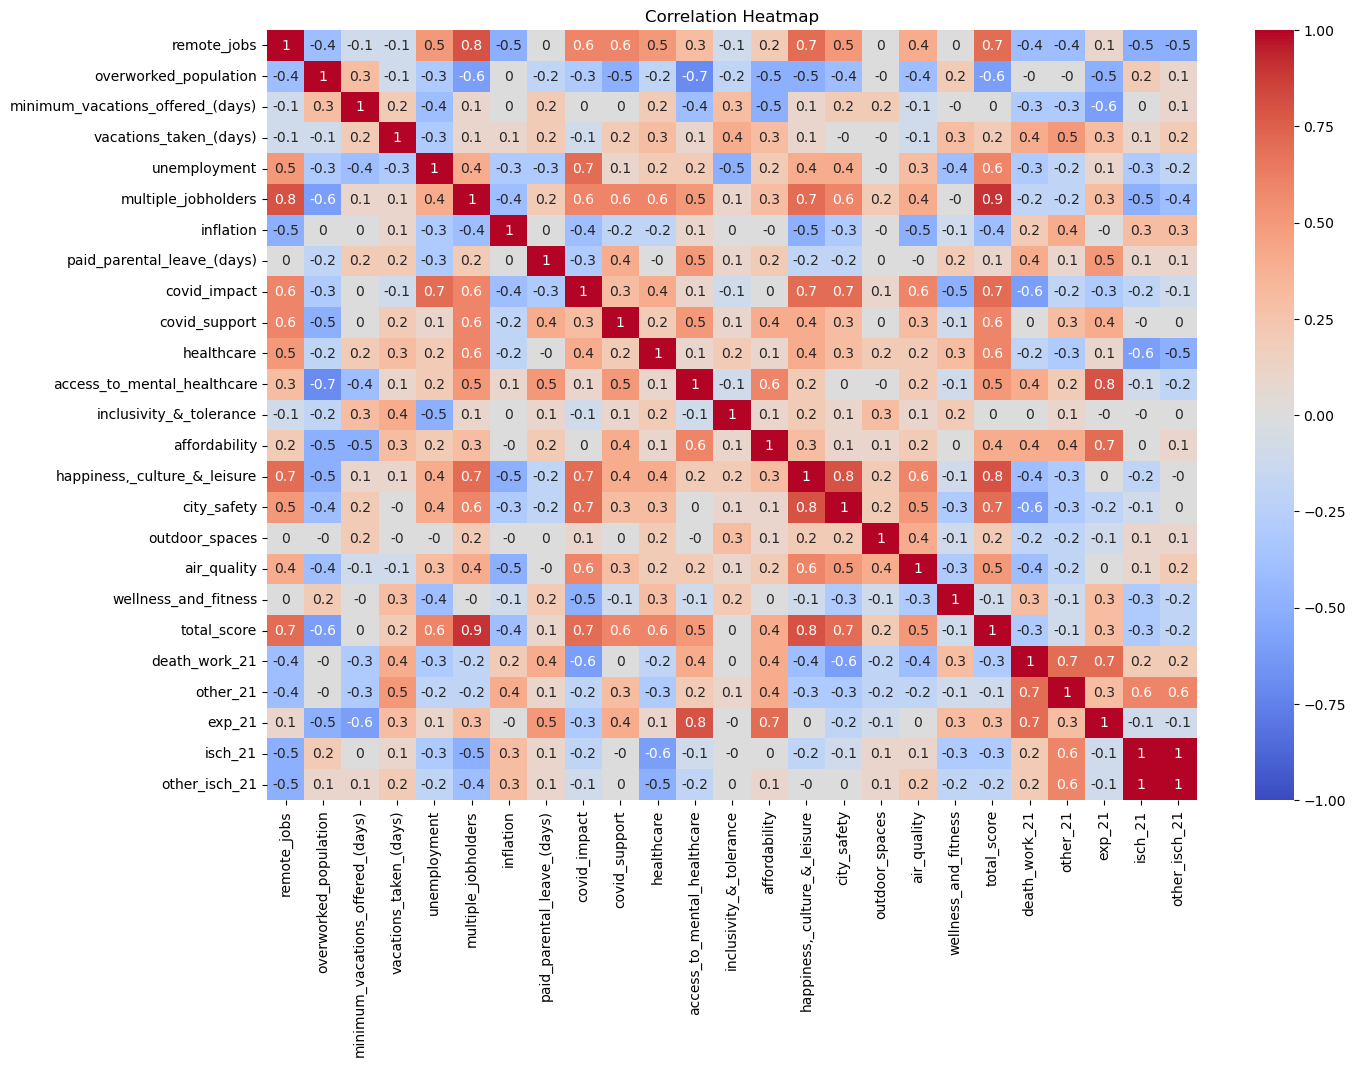

In [276]:
plt.figure(figsize=(15,10))

sns.heatmap(cor_2, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

In [277]:
#Define a threshold to split the groups, for example, median or mean value

threshold = cor_wlb_heart[''].median()

# Split into two groups
max_score = cor_wlb_heart[cor_wlb_heart['total_score'] > threshold]['death_work_21']
min_score = cor_wlb_heart[cor_wlb_heart['total_score'] <= threshold]['death_work_21']


# Calculate t-statistic and p-value
t_stat, p_value = ttest_ind(max_score, min_score)
print(f'T-test results: t-statistic = {t_stat}, p-value = {p_value}')

KeyError: ''

In [286]:
wlb_heart_2.columns

Index(['city', 'country', 'remote_jobs', 'overworked_population',
       'minimum_vacations_offered_(days)', 'vacations_taken_(days)',
       'unemployment', 'multiple_jobholders', 'inflation',
       'paid_parental_leave_(days)', 'covid_impact', 'covid_support',
       'healthcare', 'access_to_mental_healthcare', 'inclusivity_&_tolerance',
       'affordability', 'happiness,_culture_&_leisure', 'city_safety',
       'outdoor_spaces', 'air_quality', 'wellness_and_fitness', 'total_score',
       'cvd_20', 'year', 'Total', 'males', 'females', 'total_under_65',
       'males_under_65', 'females_under_65', 'total_over_65', 'males_over_65',
       'females_over_65', 'death_work_13', 'death_work_14', 'death_work_15',
       'death_work_16', 'death_work_17', 'death_work_18', 'death_work_19',
       'death_work_20', 'death_work_21', 'death_work_22', 'other_12',
       'other_13', 'other_14', 'other_15', 'other_16', 'other_17', 'other_18',
       'other_19', 'other_20', 'other_21', 'exp_12', 'e

In [ ]:
wlb_heart_work = wlb_heart_2.drop(columns=['city', 'country',
       'unemployment', 'covid_impact', 'covid_support',
       'healthcare', 'access_to_mental_healthcare', 'inclusivity_&_tolerance',
       'affordability', 'happiness,_culture_&_leisure', 'city_safety',
       'outdoor_spaces', 'air_quality', 'wellness_and_fitness', 'total_score',
       'cvd_20', 'year', 'Total', 'males', 'females', 'total_under_65',
       'males_under_65', 'females_under_65', 'total_over_65', 'males_over_65',
       'females_over_65', 'death_work_13', 'death_work_14', 'death_work_15',
       'death_work_16', 'death_work_17', 'death_work_18', 'death_work_19',
       'death_work_20', 'death_work_21', 'death_work_22', 'other_12',
       'other_13', 'other_14', 'other_15', 'other_16', 'other_17', 'other_18',
       'other_19', 'other_20', 'other_21', 'exp_12', 'exp_13', 'exp_14',
       'exp_15', 'exp_16', 'exp_17', 'exp_18', 'exp_19', 'exp_20', 'exp_21',
       'exp_22', 'exp_23', 'isch_12', 'isch_13', 'isch_14', 'isch_15',
       'isch_16', 'isch_17', 'isch_18', 'isch_19', 'isch_20', 'isch_21',
       'other_isch_12', 'other_isch_13', 'other_isch_14', 'other_isch_15',
       'other_isch_16', 'other_isch_17', 'other_isch_18', 'other_isch_19',
       'other_isch_20', 'other_isch_21'])

In [ ]:
wlb_heart_work.columns

Index(['remote_jobs', 'overworked_population',
       'minimum_vacations_offered_(days)', 'vacations_taken_(days)',
       'multiple_jobholders', 'inflation', 'paid_parental_leave_(days)',
       'all_cvd_21'],
      dtype='object')

In [323]:
corr_work = wlb_heart_work.corr()

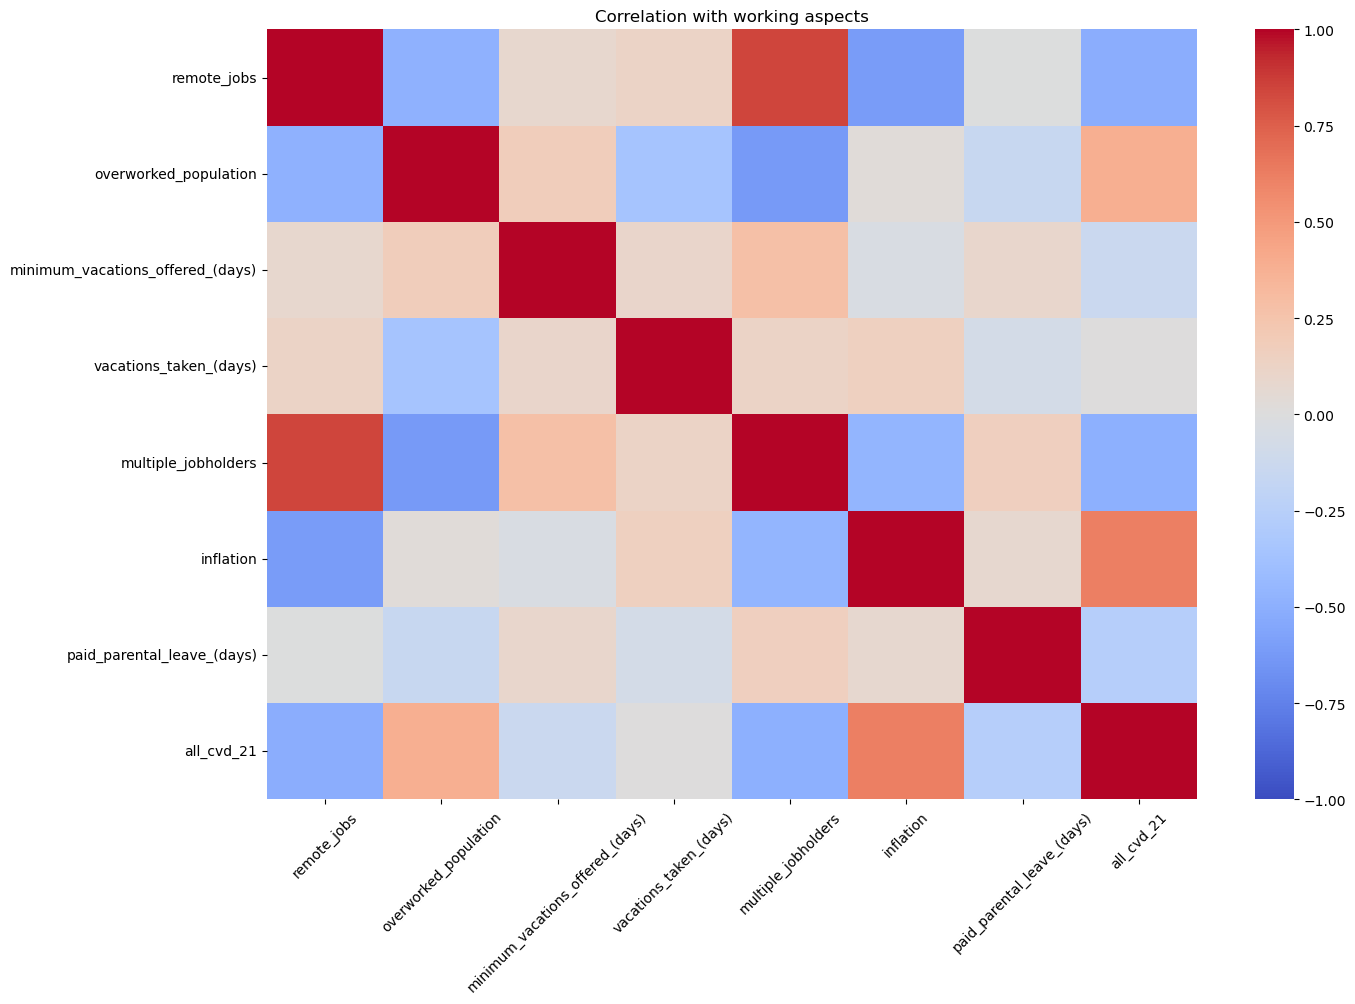

In [325]:
plt.figure(figsize=(15,10))

sns.heatmap(corr_work, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation with working aspects')
plt.xticks(rotation= 45)
plt.show()

In [ ]:
wlb_heart_society = wlb_heart_2.drop(columns=['city', 'country', 'remote_jobs', 'overworked_population',
       'minimum_vacations_offered_(days)', 'vacations_taken_(days)',
       'unemployment', 'multiple_jobholders', 'inflation',
       'paid_parental_leave_(days)', 'covid_impact', 'covid_support',
       'outdoor_spaces', 'air_quality', 'wellness_and_fitness',
       'cvd_20', 'year', 'Total', 'males', 'females', 'total_under_65',
       'males_under_65', 'females_under_65', 'total_over_65', 'males_over_65',
       'females_over_65', 'death_work_13', 'death_work_14', 'death_work_15',
       'death_work_16', 'death_work_17', 'death_work_18', 'death_work_19',
       'death_work_20', 'death_work_21', 'death_work_22', 'other_12',
       'other_13', 'other_14', 'other_15', 'other_16', 'other_17', 'other_18',
       'other_19', 'other_20', 'other_21', 'exp_12', 'exp_13', 'exp_14',
       'exp_15', 'exp_16', 'exp_17', 'exp_18', 'exp_19', 'exp_20', 'exp_21',
       'exp_22', 'exp_23', 'isch_12', 'isch_13', 'isch_14', 'isch_15',
       'isch_16', 'isch_17', 'isch_18', 'isch_19', 'isch_20', 'isch_21',
       'other_isch_12', 'other_isch_13', 'other_isch_14', 'other_isch_15',
       'other_isch_16', 'other_isch_17', 'other_isch_18', 'other_isch_19',
       'other_isch_20', 'other_isch_21', 'affordability', 'happiness,_culture_&_leisure'])

In [ ]:
wlb_heart_society.columns

Index(['healthcare', 'access_to_mental_healthcare', 'inclusivity_&_tolerance',
       'city_safety', 'total_score', 'all_cvd_21'],
      dtype='object')

In [ ]:
corr_society = wlb_heart_society.corr().round(1)

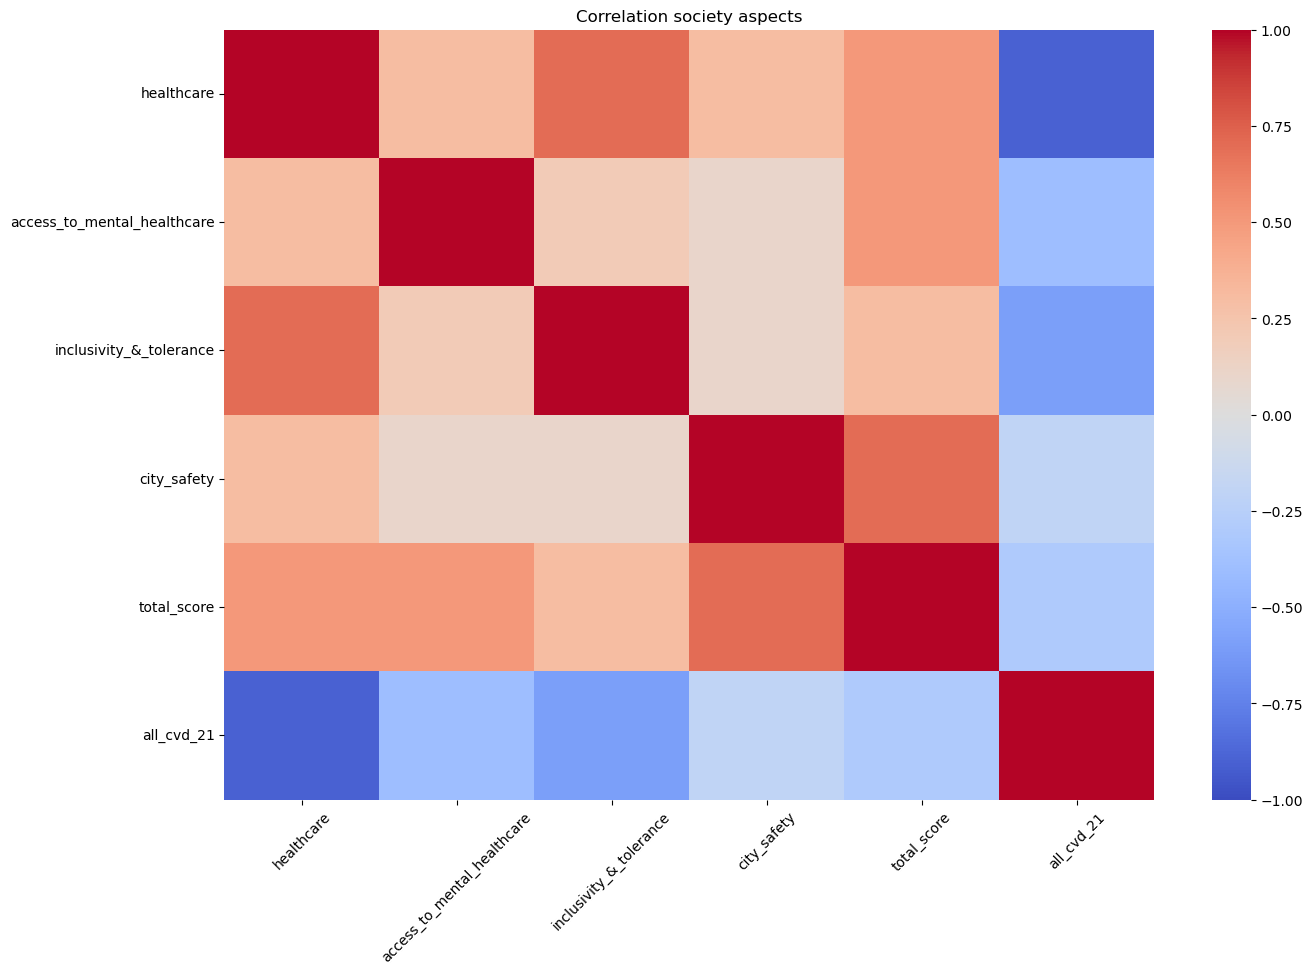

In [ ]:
plt.figure(figsize=(15,10))

sns.heatmap(corr_society, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation society aspects')
plt.xticks(rotation= 45)
plt.show()

In [ ]:
wlb_heart_city = wlb_heart_2.drop(columns=[ 'city', 'country', 'remote_jobs', 'overworked_population',
       'minimum_vacations_offered_(days)', 'vacations_taken_(days)',
       'unemployment', 'multiple_jobholders', 'inflation',
       'paid_parental_leave_(days)', 'covid_impact', 'covid_support',
       'healthcare', 'access_to_mental_healthcare', 'inclusivity_&_tolerance',
       'affordability', 'cvd_20', 'year', 'Total', 'males', 'females', 'total_under_65',
       'males_under_65', 'females_under_65', 'total_over_65', 'males_over_65',
       'females_over_65', 'death_work_13', 'death_work_14', 'death_work_15',
       'death_work_16', 'death_work_17', 'death_work_18', 'death_work_19',
       'death_work_20', 'death_work_21', 'death_work_22', 'other_12',
       'other_13', 'other_14', 'other_15', 'other_16', 'other_17', 'other_18',
       'other_19', 'other_20', 'other_21', 'exp_12', 'exp_13', 'exp_14',
       'exp_15', 'exp_16', 'exp_17', 'exp_18', 'exp_19', 'exp_20', 'exp_21',
       'exp_22', 'exp_23', 'isch_12', 'isch_13', 'isch_14', 'isch_15',
       'isch_16', 'isch_17', 'isch_18', 'isch_19', 'isch_20', 'isch_21',
       'other_isch_12', 'other_isch_13', 'other_isch_14', 'other_isch_15',
       'other_isch_16', 'other_isch_17', 'other_isch_18', 'other_isch_19',
       'other_isch_20', 'other_isch_21'])

In [ ]:
corr_city = wlb_heart_city.corr().round(1)

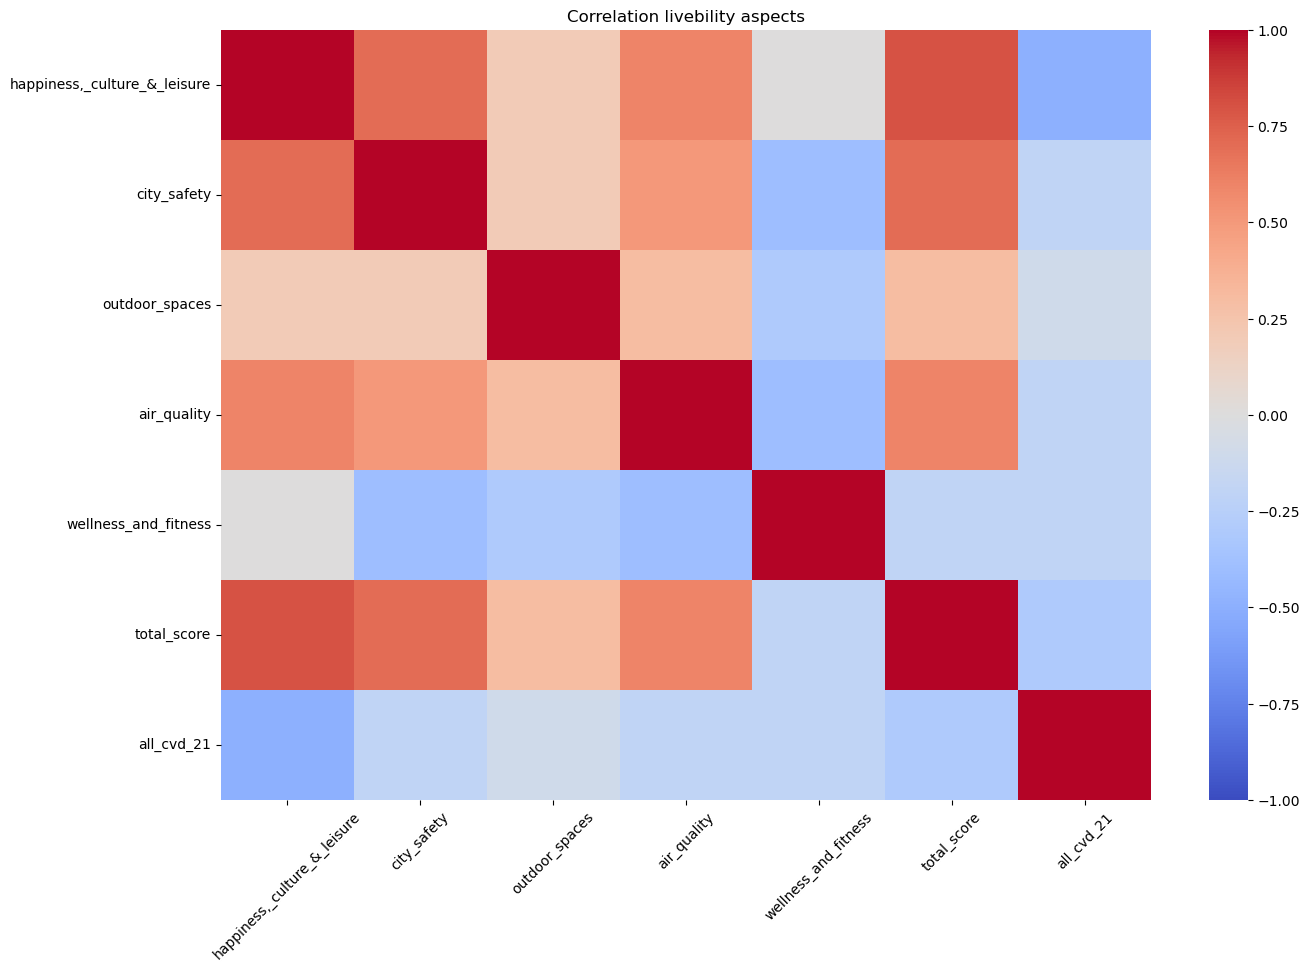

In [ ]:
plt.figure(figsize=(15,10))

sns.heatmap(corr_city, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation livebility aspects')
plt.xticks(rotation= 45)
plt.show()

In [ ]:
focus_columns = wlb_heart_2.drop(columns=['city', 'country', 'remote_jobs', 'overworked_population',
       'minimum_vacations_offered_(days)', 'vacations_taken_(days)',
       'unemployment', 'multiple_jobholders', 'inflation',
       'paid_parental_leave_(days)', 'covid_impact', 'covid_support',
       'healthcare', 'access_to_mental_healthcare', 'inclusivity_&_tolerance',
       'affordability', 'happiness,_culture_&_leisure', 'city_safety',
       'outdoor_spaces', 'air_quality', 'wellness_and_fitness', 'total_score',
       'cvd_20', 'year', 'Total', 'males', 'females', 'total_under_65',
       'males_under_65', 'females_under_65', 'total_over_65', 'males_over_65',
       'females_over_65', 'death_work_13', 'death_work_14', 'death_work_15',
       'death_work_16', 'death_work_17', 'death_work_18', 'death_work_19',
       'death_work_20', 'death_work_21', 'death_work_22', 'other_12',
       'other_13', 'other_14', 'other_15', 'other_16', 'other_17', 'other_18',
       'other_19', 'other_20', 'other_21', 'exp_12', 'exp_13', 'exp_14',
       'exp_15', 'exp_16', 'exp_17', 'exp_18', 'exp_19', 'exp_20', 'exp_21',
       'exp_22', 'exp_23', 'isch_12', 'isch_13', 'isch_14', 'isch_15',
       'isch_16', 'isch_17', 'isch_18', 'isch_19', 'isch_20', 'isch_21',
       'other_isch_12', 'other_isch_13', 'other_isch_14', 'other_isch_15',
       'other_isch_16', 'other_isch_17', 'other_isch_18', 'other_isch_19',
       'other_isch_20', 'other_isch_21', 'all_cvd_21'])

KeyError: "['city', 'country', 'remote_jobs', 'overworked_population', 'minimum_vacations_offered_(days)', 'vacations_taken_(days)', 'unemployment', 'multiple_jobholders', 'covid_impact', 'covid_support', 'access_to_mental_healthcare', 'inclusivity_&_tolerance', 'affordability', 'happiness,_culture_&_leisure', 'city_safety', 'outdoor_spaces', 'air_quality', 'wellness_and_fitness', 'total_score', 'cvd_20', 'year', 'Total', 'males', 'females', 'total_under_65', 'males_under_65', 'females_under_65', 'total_over_65', 'males_over_65', 'females_over_65', 'death_work_13', 'death_work_14', 'death_work_15', 'death_work_16', 'death_work_17', 'death_work_18', 'death_work_19', 'death_work_20', 'death_work_21', 'death_work_22', 'other_12', 'other_13', 'other_14', 'other_15', 'other_16', 'other_17', 'other_18', 'other_19', 'other_20', 'other_21', 'exp_12', 'exp_13', 'exp_14', 'exp_15', 'exp_16', 'exp_17', 'exp_18', 'exp_19', 'exp_20', 'exp_21', 'exp_22', 'exp_23', 'isch_12', 'isch_13', 'isch_14', 'isch_15', 'isch_16', 'isch_17', 'isch_18', 'isch_19', 'isch_20', 'isch_21', 'other_isch_12', 'other_isch_13', 'other_isch_14', 'other_isch_15', 'other_isch_16', 'other_isch_17', 'other_isch_18', 'other_isch_19', 'other_isch_20', 'other_isch_21'] not found in axis"

In [ ]:
cor_3 = wlb_heart_2_all_CVD.corr(method="spearman").round(1)

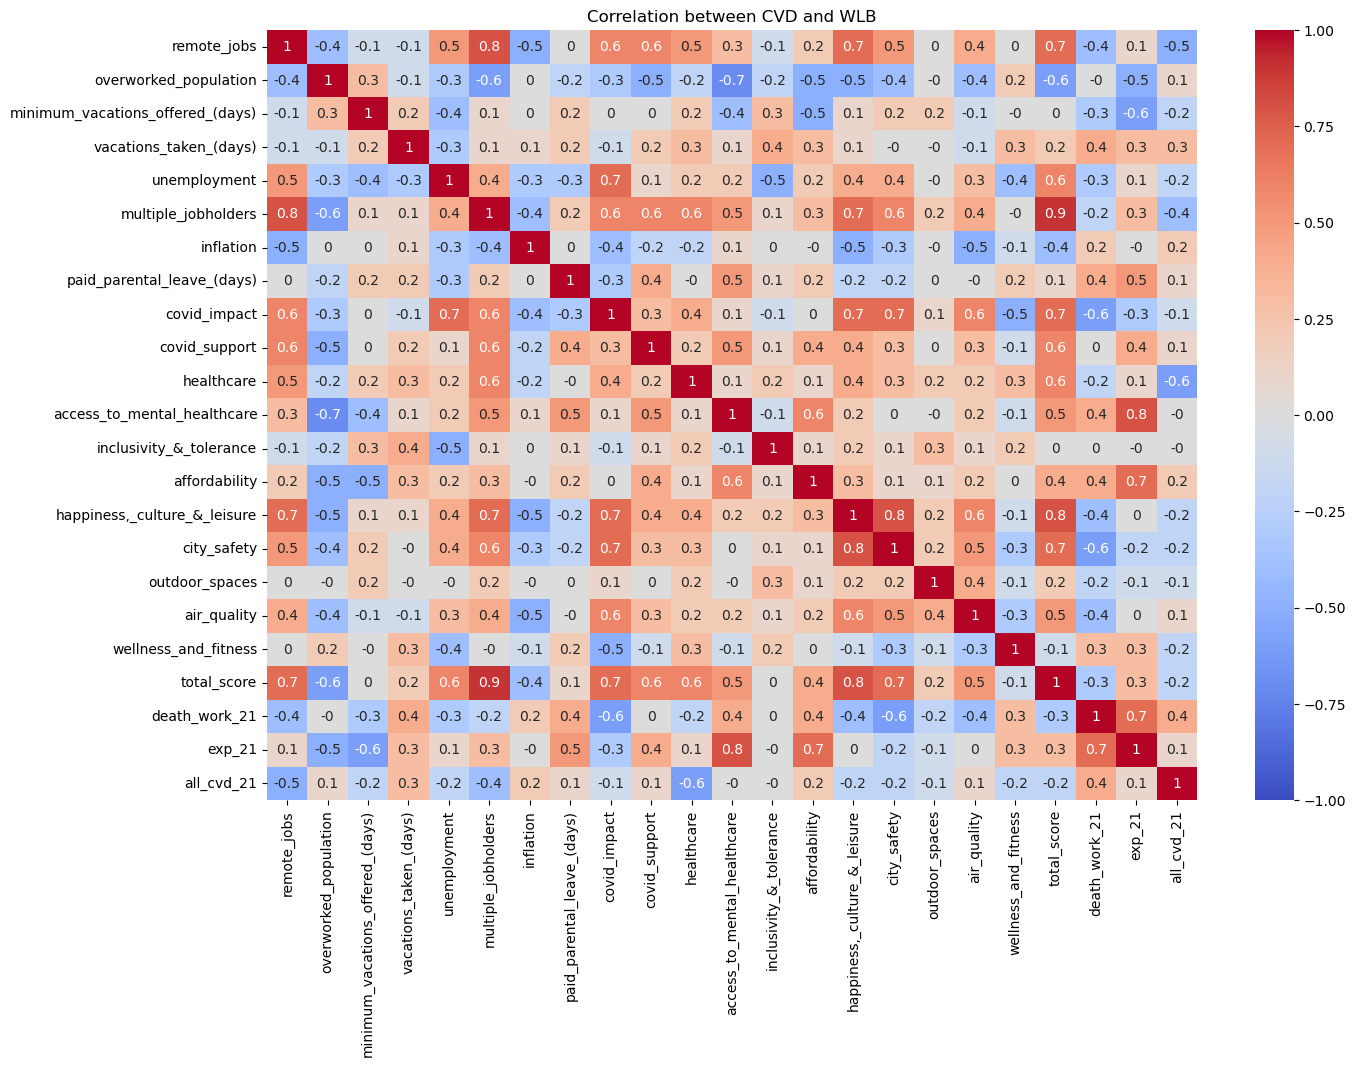

In [ ]:
plt.figure(figsize=(15,10))

sns.heatmap(cor_3, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation between CVD and WLB')
plt.show()

In [ ]:
corr_work = wlb_heart_work.corr().round(1)

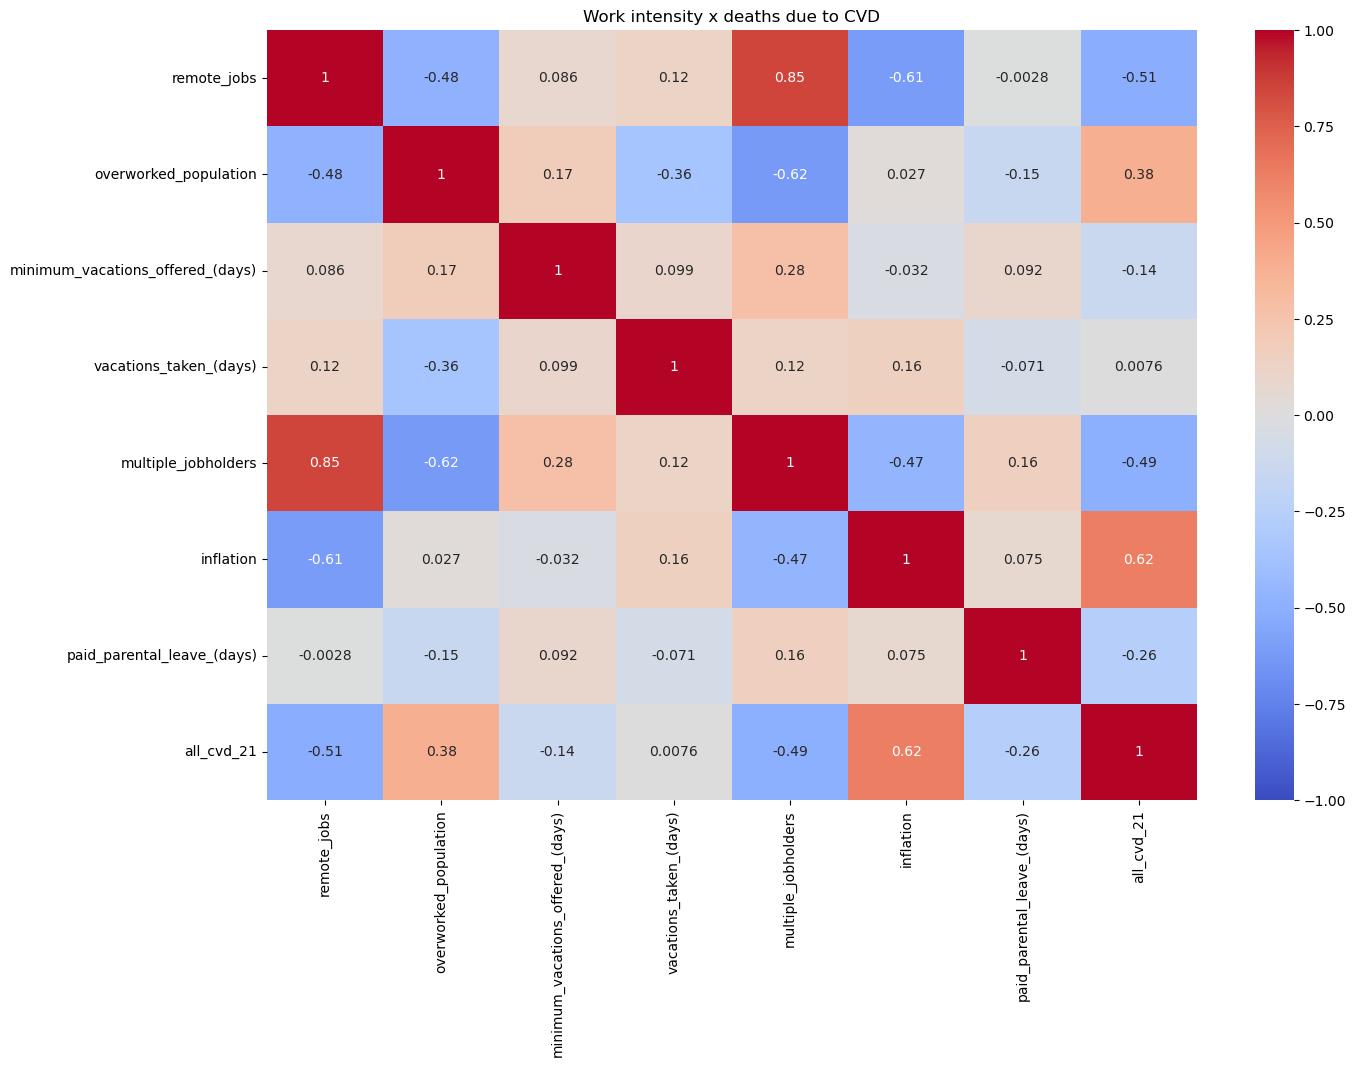

In [ ]:
plt.figure(figsize=(15,10))

sns.heatmap(corr_work, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Work intensity x deaths due to CVD')
plt.show()

In [ ]:
std_death = pd.read_excel('Heart data\Std death General table.xlsx')

In [ ]:
std_death.rename(columns={'TIME': 'year', 'GEO (Labels)' : 'country'}, inplace=True)

In [ ]:
std_death

,year,country,total,males,females,young_total,young_males,young_females,total_old,old_males,old_females
0,2018,EU 27,994.75,1244.85,806.89,203.99,275.61,134.72,4259.19,5246.07,3581.72
1,2018,Belgium,946.05,1163.21,786.31,177.53,219.68,135.44,4118.67,5058.26,3473.25
2,2018,Bulgaria,1588.85,1998.18,1286.24,367.30,514.08,226.44,6631.65,8124.84,5661.31
3,2018,Czechia,1212.37,1514.40,990.73,225.61,308.00,143.63,5285.90,6494.66,4487.74
4,2018,Denmark,1023.93,1238.38,866.05,176.25,216.82,135.41,4523.37,5455.58,3882.25
...,...,...,...,...,...,...,...,...,...,...,...
132,2021,Liechtenstein,783.48,916.00,656.07,129.89,170.81,90.29,3481.63,3992.31,2991.73
133,2021,Norway,832.27,962.89,729.19,120.93,145.64,95.12,3768.81,4336.70,3346.78
134,2021,Switzerland,796.99,969.73,666.47,123.85,156.83,90.50,3575.86,4325.56,3044.19
135,2021,Serbia,2032.92,2415.95,1728.28,416.15,561.36,279.73,8707.26,10072.09,7708.22


In [ ]:
# sex_colors = {'Male': 'blue', 'Female':'salmon'}

# plt.figure(figsize=(12,8))
# age_sex = sns.barplot(data= std_death, x= 'country', y= 'year', hue= 'sex', palette= sex_colors)

# age_sex.set_title('Heart Attack Risk by Age and Sex')
# age_sex.set_xlabel('Age', fontsize= 15)
# age_sex.set_ylabel( 'Heart Attack Risk (%)', fontsize=15)

# plt.legend(title='Sex', title_fontsize= '13', loc ='upper right', fontsize= '11')
# plt.xticks(rotation= 30)

# plt.tight_layout()
# plt.show

In [ ]:
std_cvd = pd.read_excel('Heart data\Std CVD Europe.xlsx')

In [ ]:
std_cvd

,years,country,total,males,females,total_young,males_young,females_young,total_old,male_old,females_old
0,2018,EU 27,355.33,424.62,300.77,42.76,64.90,21.50,1645.69,1909.62,1453.63
1,2018,Belgium,237.80,288.56,200.02,25.77,35.74,15.86,1113.10,1332.28,960.26
2,2018,Bulgaria,1075.93,1294.70,912.21,164.60,243.48,89.19,4838.09,5634.38,4309.79
3,2018,Czechia,556.77,669.25,471.93,56.70,86.65,27.23,2621.14,3074.34,2307.74
4,2018,Denmark,235.71,302.38,186.20,26.58,37.71,15.40,1099.05,1394.97,891.28
...,...,...,...,...,...,...,...,...,...,...,...
132,2021,Liechtenstein,266.61,290.01,234.88,18.47,26.60,10.46,1290.97,1377.42,1161.32
133,2021,Norway,208.14,250.19,173.15,18.45,27.69,8.87,991.18,1168.73,851.36
134,2021,Switzerland,220.58,267.19,185.47,17.67,26.81,8.45,1058.23,1259.51,916.25
135,2021,Serbia,884.39,971.63,807.54,102.24,153.08,54.94,4113.29,4350.75,3914.42


In [ ]:
wlb_heart_2.columns

Index(['country', 'remote_jobs', 'overworked_population',
       'minimum_vacations_offered_(days)', 'vacations_taken_(days)',
       'unemployment', 'multiple_jobholders', 'inflation',
       'paid_parental_leave_(days)', 'covid_impact', 'covid_support',
       'healthcare', 'access_to_mental_healthcare', 'inclusivity_&_tolerance',
       'affordability', 'happiness,_culture_&_leisure', 'city_safety',
       'outdoor_spaces', 'air_quality', 'wellness_and_fitness', 'total_score',
       'cvd_20', 'year', 'Total', 'males', 'females', 'total_under_65',
       'males_under_65', 'females_under_65', 'total_over_65', 'males_over_65',
       'females_over_65', 'death_work_13', 'death_work_14', 'death_work_15',
       'death_work_16', 'death_work_17', 'death_work_18', 'death_work_19',
       'death_work_20', 'death_work_21', 'death_work_22', 'other_12',
       'other_13', 'other_14', 'other_15', 'other_16', 'other_17', 'other_18',
       'other_19', 'other_20', 'other_21', 'exp_12', 'exp_13', 

In [ ]:
wlb_heart_2.columns

Index(['country', 'remote_jobs', 'overworked_population',
       'minimum_vacations_offered_(days)', 'vacations_taken_(days)',
       'unemployment', 'multiple_jobholders', 'inflation',
       'paid_parental_leave_(days)', 'covid_impact', 'covid_support',
       'healthcare', 'access_to_mental_healthcare', 'inclusivity_&_tolerance',
       'affordability', 'happiness,_culture_&_leisure', 'city_safety',
       'outdoor_spaces', 'air_quality', 'wellness_and_fitness', 'total_score',
       'cvd_20', 'year', 'Total', 'males', 'females', 'total_under_65',
       'males_under_65', 'females_under_65', 'total_over_65', 'males_over_65',
       'females_over_65', 'death_work_13', 'death_work_14', 'death_work_15',
       'death_work_16', 'death_work_17', 'death_work_18', 'death_work_19',
       'death_work_20', 'death_work_21', 'death_work_22', 'other_12',
       'other_13', 'other_14', 'other_15', 'other_16', 'other_17', 'other_18',
       'other_19', 'other_20', 'other_21', 'exp_12', 'exp_13', 

In [ ]:
# Group by the 'Country' column and aggregate the 'City' column as a list
#wlb_1 = wlb.groupby('country')['city'].agg(list).reset_index()

In [ ]:
wlb_numeric_columns = ['remote_jobs', 'overworked_population',
       'minimum_vacations_offered_(days)', 'vacations_taken_(days)',
       'unemployment', 'multiple_jobholders', 'inflation',
       'paid_parental_leave_(days)', 'covid_impact', 'covid_support',
       'healthcare', 'access_to_mental_healthcare', 'inclusivity_&_tolerance',
       'affordability', 'happiness,_culture_&_leisure', 'city_safety',
       'outdoor_spaces', 'air_quality', 'wellness_and_fitness', 'total_score']

In [ ]:
for col in wlb_numeric_columns:
    wlb[col] = pd.to_numeric(wlb[col], errors='coerce')

In [ ]:
wlb_1 = wlb.groupby('country').agg({'city':list, 'remote_jobs' : 'mean', 'overworked_population': 'mean',
       'minimum_vacations_offered_(days)' : 'mean', 'vacations_taken_(days)' : 'mean',
       'unemployment' :'mean', 'multiple_jobholders' : 'mean', 'inflation' : 'mean',
       'paid_parental_leave_(days)' : 'mean', 'covid_impact' : 'mean', 'covid_support' :'mean',
       'healthcare' :'mean', 'access_to_mental_healthcare' :'mean', 'inclusivity_&_tolerance' :'mean',
       'affordability' :'mean', 'happiness,_culture_&_leisure' : 'mean', 'city_safety' :'mean',
       'outdoor_spaces':'mean', 'air_quality' :'mean', 'wellness_and_fitness' :'mean', 'total_score' :'mean'
      }).reset_index()

In [ ]:
wlb_1.columns 

Index(['country', 'city', 'remote_jobs', 'overworked_population',
       'minimum_vacations_offered_(days)', 'vacations_taken_(days)',
       'unemployment', 'multiple_jobholders', 'inflation',
       'paid_parental_leave_(days)', 'covid_impact', 'covid_support',
       'healthcare', 'access_to_mental_healthcare', 'inclusivity_&_tolerance',
       'affordability', 'happiness,_culture_&_leisure', 'city_safety',
       'outdoor_spaces', 'air_quality', 'wellness_and_fitness', 'total_score'],
      dtype='object')

In [ ]:
wlb_heart_agg = pd.merge(wlb_1, all_heart, on= 'country', how='inner')

In [ ]:
wlb_heart_agg.describe()

,remote_jobs,overworked_population,minimum_vacations_offered_(days),vacations_taken_(days),unemployment,multiple_jobholders,inflation,paid_parental_leave_(days),covid_impact,covid_support,...,other_isch_12,other_isch_13,other_isch_14,other_isch_15,other_isch_16,other_isch_17,other_isch_18,other_isch_19,other_isch_20,other_isch_21
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,...,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,38.376000,12.431852,22.266667,23.673333,91.191852,5.113333,5.958667,292.124467,75.484444,89.120000,...,15.572667,15.162000,15.672667,15.470000,14.692667,14.292667,14.195333,13.693333,13.568000,13.680667
std,4.258807,1.508172,2.342436,6.876190,4.327617,2.501218,2.069776,197.732903,6.819755,8.896329,...,16.594922,15.607653,16.256216,15.798861,14.951739,15.422766,15.198195,14.570825,14.008309,14.810060
min,30.920000,8.600000,20.000000,0.000000,82.550000,1.200000,1.800000,1.127000,63.300000,71.200000,...,3.310000,4.640000,4.890000,4.550000,4.560000,4.030000,4.170000,3.940000,3.920000,3.920000
25%,34.990000,11.644444,20.000000,24.000000,88.000000,2.700000,4.790000,114.800000,69.800000,84.700000,...,6.320000,6.380000,7.070000,7.430000,7.180000,7.000000,6.480000,6.810000,6.780000,6.540000
50%,38.710000,12.700000,22.000000,25.000000,91.000000,4.800000,5.790000,336.700000,74.800000,90.800000,...,10.170000,9.990000,10.110000,9.790000,9.840000,9.450000,9.240000,8.960000,9.350000,9.520000
75%,41.720000,13.200000,25.000000,27.000000,94.800000,7.600000,6.570000,466.900000,81.133333,98.500000,...,13.460000,12.970000,12.870000,14.090000,12.820000,11.850000,12.500000,11.740000,11.090000,11.340000
max,44.860000,14.700000,25.000000,30.000000,98.066667,9.100000,11.210000,707.000000,88.200000,100.000000,...,71.450000,67.910000,70.990000,69.630000,65.780000,68.130000,67.020000,64.810000,62.100000,65.700000


In [ ]:
wlb_heart_agg.columns

Index(['country', 'city', 'remote_jobs', 'overworked_population',
       'minimum_vacations_offered_(days)', 'vacations_taken_(days)',
       'unemployment', 'multiple_jobholders', 'inflation',
       'paid_parental_leave_(days)', 'covid_impact', 'covid_support',
       'healthcare', 'access_to_mental_healthcare', 'inclusivity_&_tolerance',
       'affordability', 'happiness,_culture_&_leisure', 'city_safety',
       'outdoor_spaces', 'air_quality', 'wellness_and_fitness', 'total_score',
       'cvd_20', 'year', 'Total', 'males', 'females', 'total_under_65',
       'males_under_65', 'females_under_65', 'total_over_65', 'males_over_65',
       'females_over_65', 'death_work_13', 'death_work_14', 'death_work_15',
       'death_work_16', 'death_work_17', 'death_work_18', 'death_work_19',
       'death_work_20', 'death_work_21', 'death_work_22', 'other_12',
       'other_13', 'other_14', 'other_15', 'other_16', 'other_17', 'other_18',
       'other_19', 'other_20', 'other_21', 'exp_12', 'e

In [ ]:
agg_cor_work = wlb_heart_agg_cor = wlb_heart_agg.drop(columns=['covid_impact', 'covid_support',
       'healthcare', 'access_to_mental_healthcare', 'inclusivity_&_tolerance',
       'affordability', 'happiness,_culture_&_leisure', 'city_safety',
       'outdoor_spaces', 'air_quality', 'wellness_and_fitness', 'total_score',
       'cvd_20', 'year','country', 'city',  'Total', 'males', 'females', 'total_under_65',
       'males_under_65', 'females_under_65', 'total_over_65', 'males_over_65', 'females_over_65', 'death_work_13', 'death_work_14', 'death_work_15',
       'death_work_16', 'death_work_17', 'death_work_18', 'death_work_19', 'death_work_20', 'death_work_22', 'other_12',
       'other_13', 'other_14', 'other_15', 'other_16', 'other_17', 'other_18', 'other_19', 'other_20', 'exp_12', 'exp_13', 'exp_14',
       'exp_15', 'exp_16', 'exp_17', 'exp_18', 'exp_19', 'exp_20', 'exp_22', 'exp_23', 'isch_12', 'isch_13', 'isch_14', 'isch_15',
       'isch_16', 'isch_17', 'isch_18', 'isch_19', 'isch_20', 'other_isch_12', 'other_isch_13', 'other_isch_14', 'other_isch_15',
       'other_isch_16', 'other_isch_17', 'other_isch_18', 'other_isch_19', 'inflation', 'other_isch_20', 'year'])

In [ ]:
agg_cor_work.columns

Index(['remote_jobs', 'overworked_population',
       'minimum_vacations_offered_(days)', 'death_work_21', 'other_21',
       'exp_21', 'isch_21', 'other_isch_21'],
      dtype='object')

In [ ]:
agg_corr_matrix = agg_cor.corr().round(1)

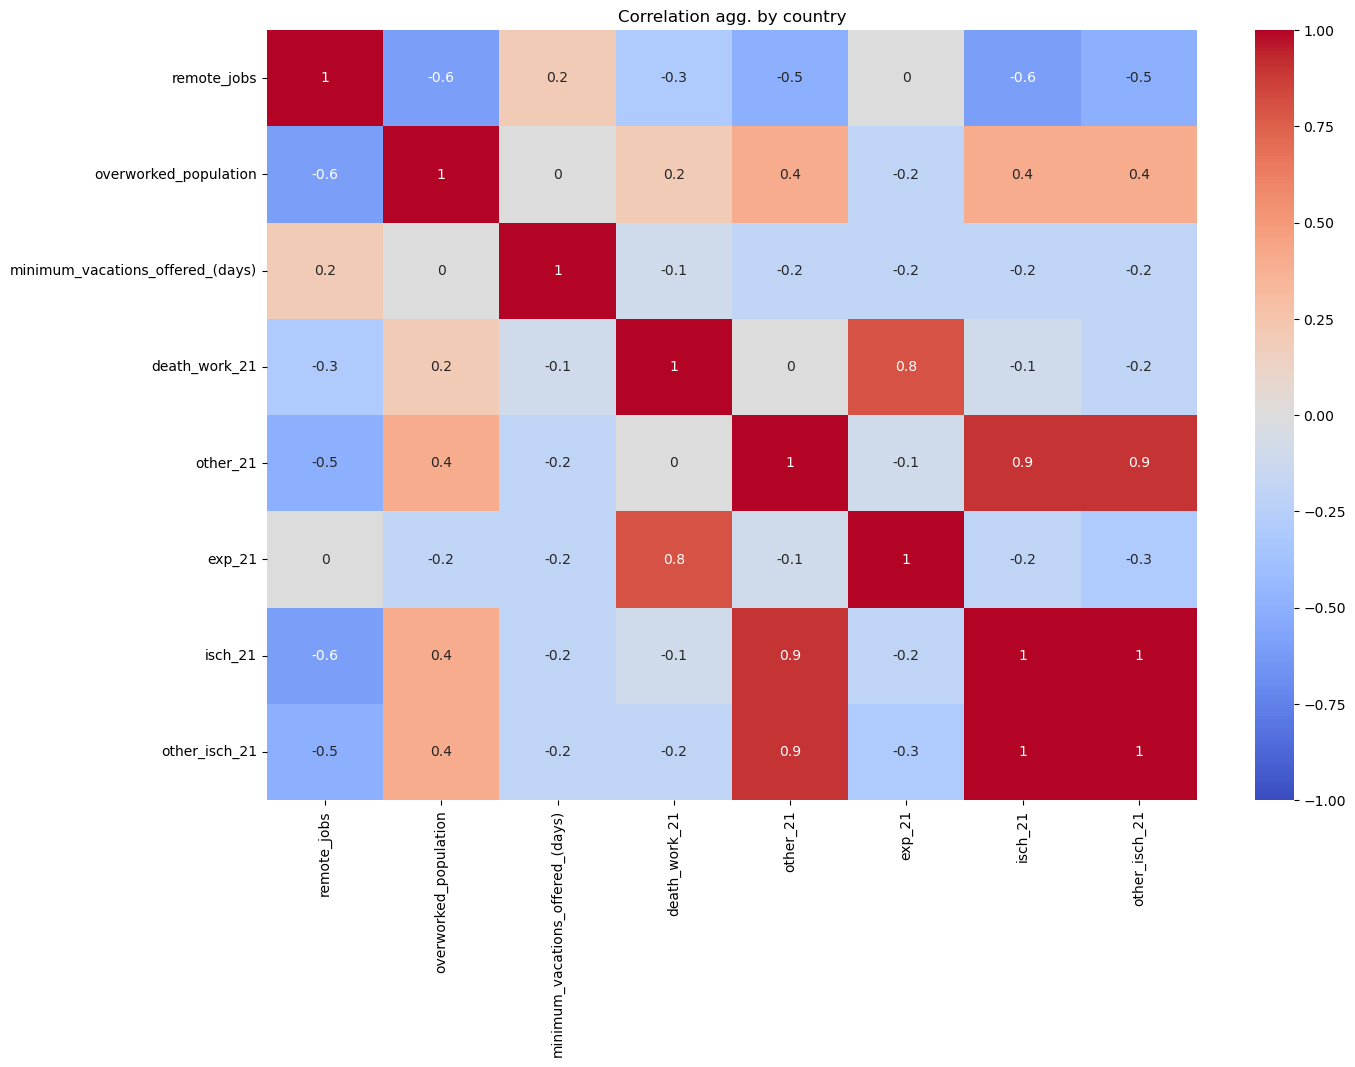

In [ ]:
plt.figure(figsize=(15,10))

sns.heatmap(agg_corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation agg. by country')
plt.show()

In [ ]:
agg_cor.columns

Index(['remote_jobs', 'overworked_population',
       'minimum_vacations_offered_(days)', 'vacations_taken_(days)',
       'unemployment', 'multiple_jobholders', 'inflation',
       'paid_parental_leave_(days)', 'covid_impact', 'covid_support',
       'healthcare', 'access_to_mental_healthcare', 'inclusivity_&_tolerance',
       'affordability', 'happiness,_culture_&_leisure', 'city_safety',
       'outdoor_spaces', 'air_quality', 'wellness_and_fitness', 'total_score',
       'cvd_20', 'death_work_21', 'other_21', 'exp_21', 'isch_21',
       'other_isch_21'],
      dtype='object')

In [ ]:
agg_cor_work = agg_cor.drop(columns=['inflation', 'covid_impact', 'covid_support',
       'healthcare', 'access_to_mental_healthcare', 'inclusivity_&_tolerance',
       'affordability', 'happiness,_culture_&_leisure', 'city_safety',
       'outdoor_spaces', 'air_quality', 'wellness_and_fitness', 'total_score',
       'cvd_20'])

In [ ]:
agg_cor_work.columns

Index(['remote_jobs', 'overworked_population',
       'minimum_vacations_offered_(days)', 'vacations_taken_(days)',
       'unemployment', 'multiple_jobholders', 'paid_parental_leave_(days)',
       'death_work_21', 'other_21', 'exp_21', 'isch_21', 'other_isch_21'],
      dtype='object')

In [ ]:
agg_work = agg_cor_work.corr().round(1)

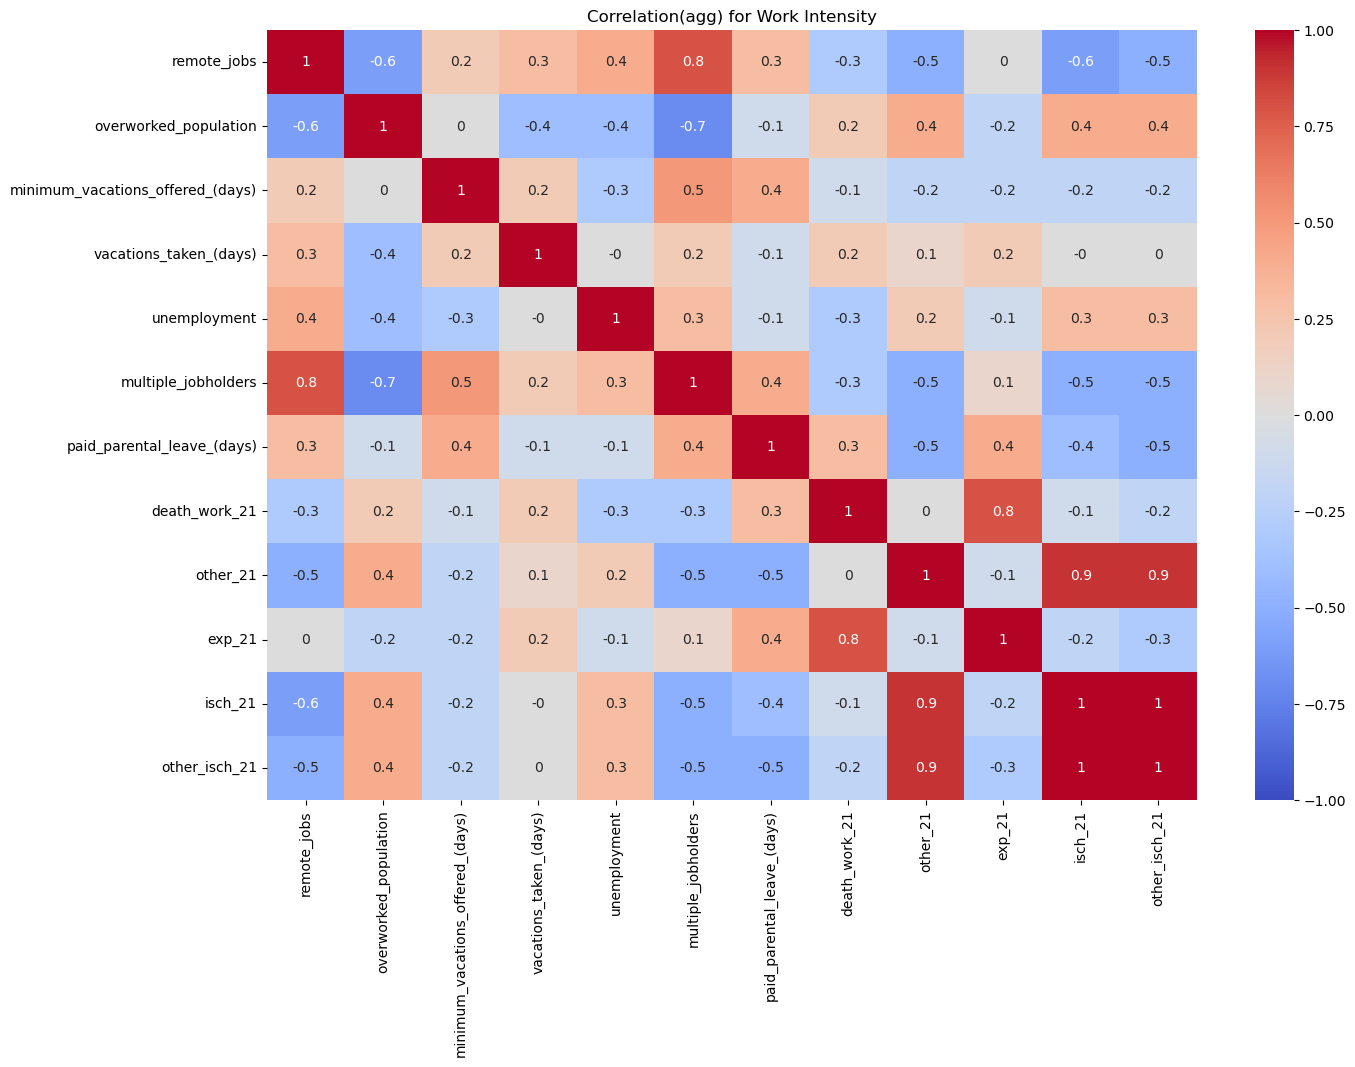

In [ ]:
plt.figure(figsize=(15,10))

sns.heatmap(agg_work, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation(agg) for Work Intensity')
plt.show()

In [ ]:
agg_cor.columns

Index(['remote_jobs', 'overworked_population',
       'minimum_vacations_offered_(days)', 'vacations_taken_(days)',
       'unemployment', 'multiple_jobholders', 'inflation',
       'paid_parental_leave_(days)', 'covid_impact', 'covid_support',
       'healthcare', 'access_to_mental_healthcare', 'inclusivity_&_tolerance',
       'affordability', 'happiness,_culture_&_leisure', 'city_safety',
       'outdoor_spaces', 'air_quality', 'wellness_and_fitness', 'total_score',
       'cvd_20', 'death_work_21', 'other_21', 'exp_21', 'isch_21',
       'other_isch_21'],
      dtype='object')

In [ ]:
agg_cor_life = agg_cor.drop(columns=['remote_jobs', 'overworked_population',
       'minimum_vacations_offered_(days)', 'vacations_taken_(days)',
       'unemployment', 'multiple_jobholders', 'inflation',
       'paid_parental_leave_(days)', 'inclusivity_&_tolerance',
       'affordability', 'happiness,_culture_&_leisure', 'city_safety',
       'outdoor_spaces', 'air_quality', 'wellness_and_fitness', 'total_score',
       'cvd_20'])

In [ ]:
agg_cor_life.columns

Index(['covid_impact', 'covid_support', 'healthcare',
       'access_to_mental_healthcare', 'death_work_21', 'other_21', 'exp_21',
       'isch_21', 'other_isch_21'],
      dtype='object')

In [ ]:
agg_life = agg_cor_life.corr().round(1)

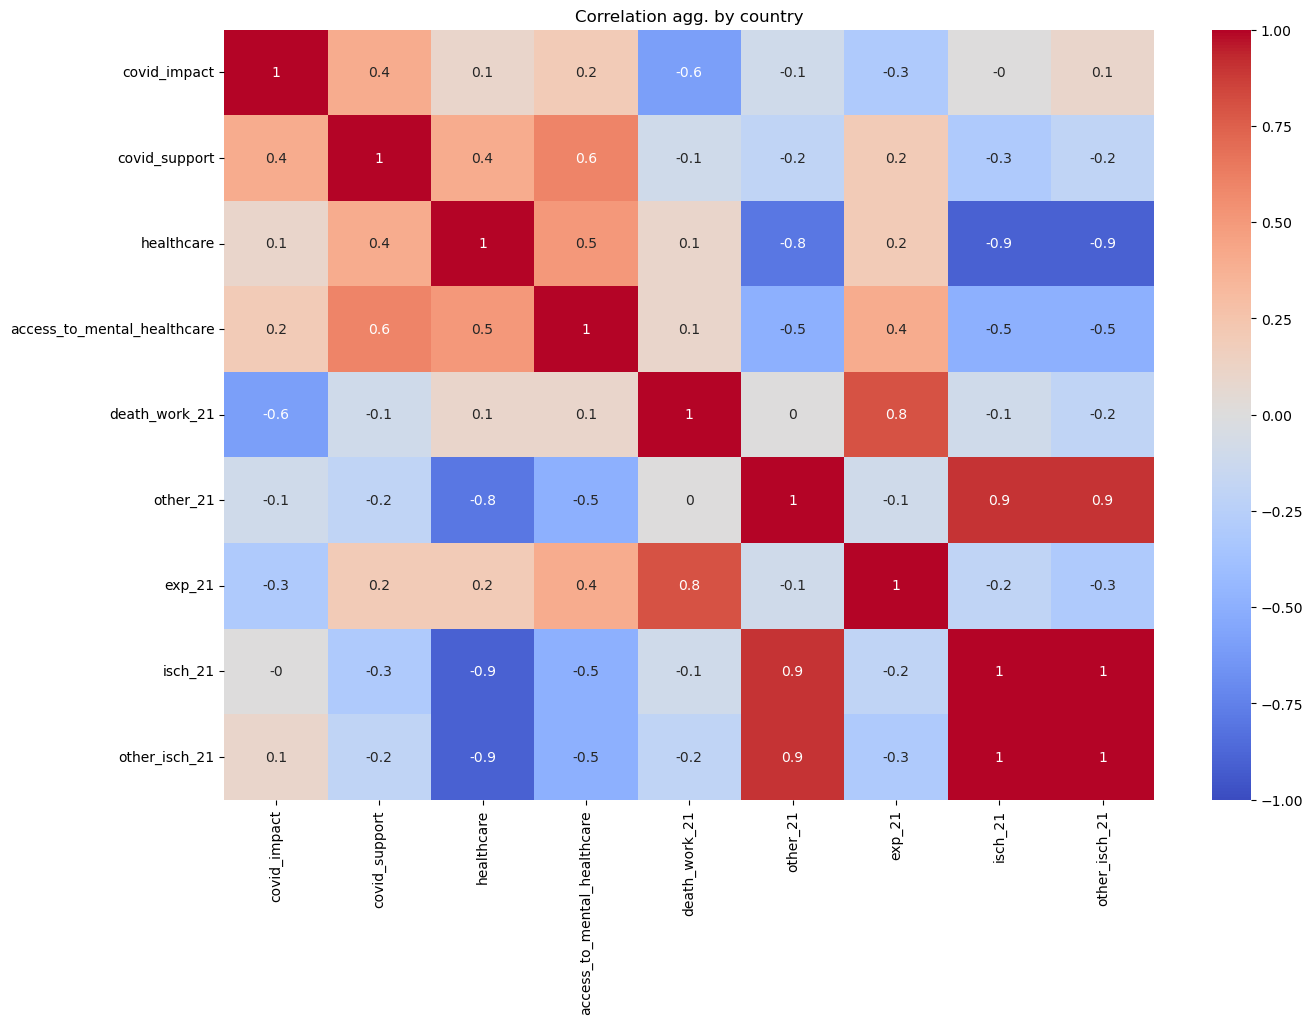

In [ ]:
plt.figure(figsize=(15,10))

sns.heatmap(agg_life, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation agg. by country')
plt.show()

In [ ]:
agg_city = agg_cor.drop(columns=['remote_jobs', 'overworked_population',
       'minimum_vacations_offered_(days)', 'vacations_taken_(days)',
       'unemployment', 'multiple_jobholders', 'inflation',
       'paid_parental_leave_(days)', 'covid_impact', 'covid_support',
       'healthcare', 'access_to_mental_healthcare','cvd_20'])

In [ ]:
agg_city = agg_city.corr().round(1)

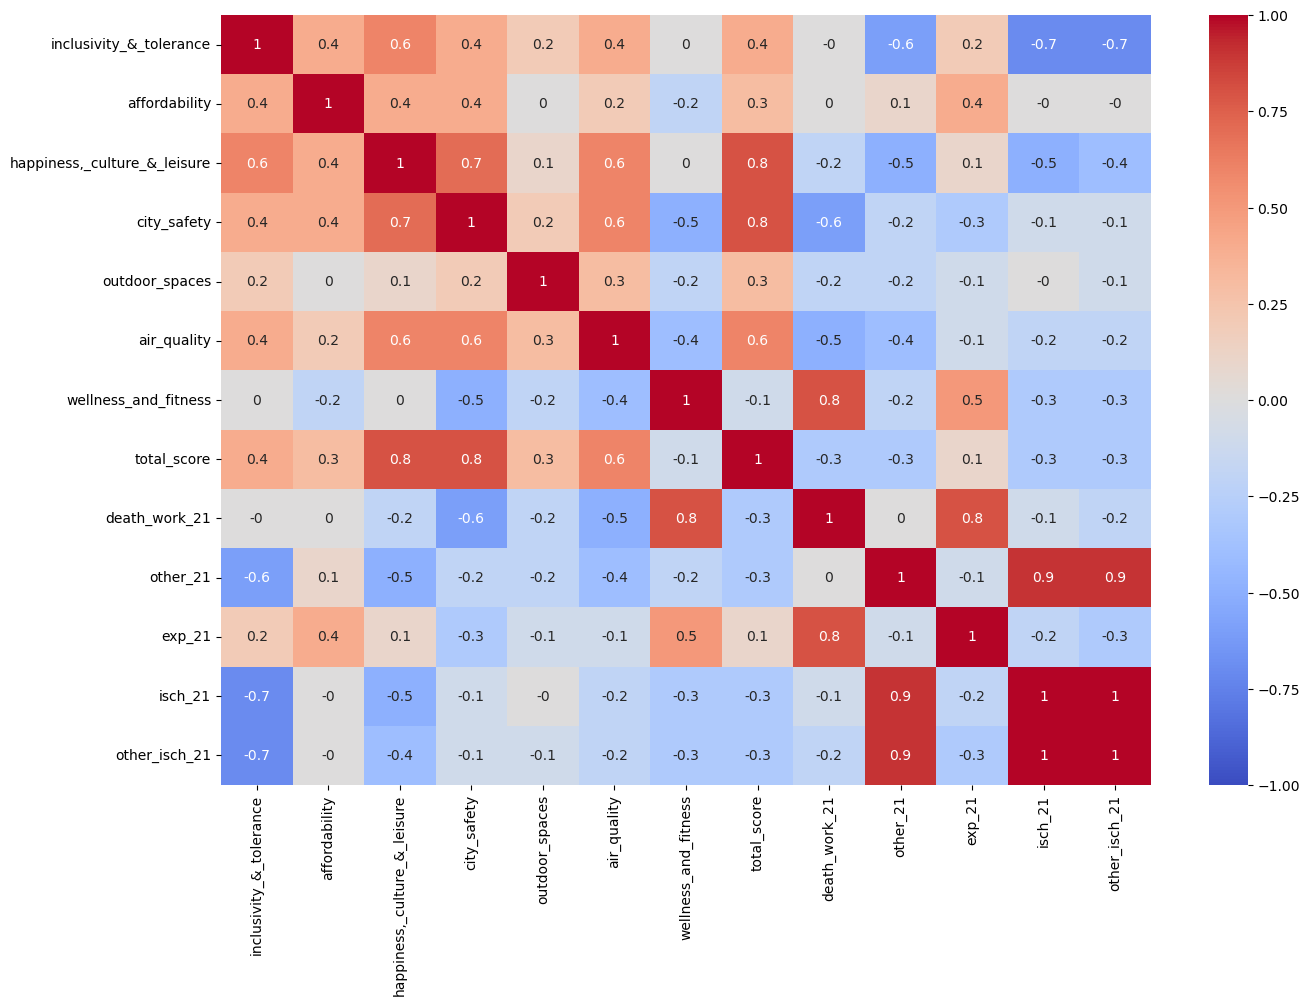

In [ ]:
plt.figure(figsize=(15,10))

sns.heatmap(agg_city, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
#plt.title('Correlation agg. by country')
plt.show()